## Data Sci Eng Methods
## Assignment 2 – AutoML
## **AutoML** 

##### In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

##### For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering. 

##### Answer the following questions for all of the models:

1. Is the relationship significant?
2. Are any model assumptions violated?
3. Is there any multicollinearity in the model?
4. In the multivariate models are predictor variables independent of all the other predictor variables?
5. In the multivariate models rank the most significant predictor variables and exclude insignificant ones from the model
6. Does the model make sense?
7. Does regularization help?
8. Which independent variables are significant?
9. Which hyperparameters are important?
10. Coding professionalism?

## Data Description

##### 1. hotel : Hotel(There is only two categories one is resort hotel and other is city hotel)

##### 2. is_canceled : The value represents 1 if the booking is canceled or it represents 0 .

##### 3. lead_time :It is the number of days between the time a guest books their room and the time they are scheduled to arive at the hotel.

##### 4. arrival_date_year : It indicates the year in which the guest will arrive to the hotel.

##### 5. arrival_date_month : It indicates the month in which guest will arrive to the hotel.

##### 6. arrival_date_week_number : This indicates the week number in which the guest will arrive to the hotel

##### 7. arrival_date_day_of_month : This indicates the day of the month in which the guest will arrive to the hotel.

##### 8. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

##### 9. stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

##### 10. adults : Number of adults

##### 11. children : Number of children

##### 12. babies : Number of babies

##### 13. meal : Type of meal booked . Categories are presented in standard hospitality meal packages:

##### (BB:"Bed & Breakfast"; HB:"Bed,Breakfast & Dinner ; FB: "Bed & All meals(Breakfast,Lunch & Dinner)

##### 14. country : Country of origin.

##### 15. market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

##### 16. distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

##### 17. is_repeated_guest : The value represents 1 if the booking name was from a repeated guest or it represents 0 .

##### 18 .previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

##### 19. previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

##### 20. reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

##### 21. assigned_room_type : Code for the type of room assigned to the booking.

##### 22. booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

##### 23. deposit_type : Indication on if the customer made a deposit to guarantee the booking.

##### 24. agent : ID of the travel agency that made the booking

##### 25. company : ID of the company/entity that made the booking or responsible for paying the booking.

##### 26. days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

##### 27. customer_type : Type of booking, assuming one of four categories

##### 28. adr : Average Daily Rate (ADR) measures the average rental revenue earned for an occupied room per day .

##### "The operating performance of a hotel or other lodging business can be determined by using the ADR."

##### 29. required_car_parking_spaces : Number of car parking spaces required by the customer

##### 30. total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

##### 31. reservation_status : Reservation last status, assuming one of three categories

##### Canceled – booking was canceled by the customer

##### Check-Out – customer has checked in but already departed

##### No-Show – customer did not check-in and did inform the hotel of the reason why

##### 32. reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to  understand when was the booking canceled or when did the customer checked-out of the hotel

## Installing packages, Importing required Libraries and H20 Initialization

AutoML (Automated Machine Learning) is a process of automating various aspects of machine learning, including model selection, hyperparameter tuning, and feature engineering. The goal of AutoML is to make machine learning more accessible to non-experts and to streamline the process of developing accurate models.

In Python, there are several AutoML libraries available that allow you to automate the machine learning process. These libraries typically provide easy-to-use interfaces and can automatically perform tasks such as data preprocessing, feature selection, and model selection.

Some popular AutoML libraries in Python include:

1. TPOT: A tool for automating the machine learning pipeline, including feature selection, model selection, and hyperparameter tuning.

2. Auto-sklearn: A library that provides an automated approach to building and optimizing machine learning models.

3. H2O.ai: An open-source platform that provides automatic machine learning, model interpretation, and production deployment.

4. AutoKeras: A framework that automates the selection of neural network architectures, hyperparameters, and optimization algorithms.

Using an AutoML library in Python can save time and effort in developing machine learning models, especially for those who are not experts in the field. However, it is important to note that AutoML is not a silver bullet and may not always result in the best-performing models.

When using the H2O AutoML library in Python, the first step is to initialize an H2O cluster. This is done by importing the H2O library and calling the h2o.init() function:

In [ ]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [ ]:
# Importing all the libararies required for the assignment
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Initialize the H2O Cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------
H2O_cluster_uptime:         1 day 1 hour 28 mins
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_namandiwan_x44muv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.004 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.13 final
--------------------------  ---------------------------------

In [ ]:
# Reading CSV file into Pandas DataFrame
data=pd.read_csv("https://raw.githubusercontent.com/namandiwan10/data-science-assignments/main/hotel_bookings.csv")

In [ ]:
# Showing the data head
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
# Getting info on data telling count, datatypes and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Getting the mean, standard deviation, max, min etc on the data
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
# Getting rows and columns for the dataset
data.shape

(119390, 32)

In [ ]:
# Cheking what features are null
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# calculate the percentage of missing values for each column
missing_values_percentage = (data.isnull().sum() / data.shape[0]) * 100

# print the columns with missing values and their percentage
print(missing_values_percentage[missing_values_percentage > 0])

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


In [ ]:
#lets create a fuction that returns the percentage of missing values(null) = (sum of null rows)*100/ (total number of rows)
def percent_missing(data):
    percent_nan = 100* data.isnull().sum() / len(data)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [ ]:
#dropping company column since 94% rows are missing
data = data.drop(['company'],axis=1)

In [ ]:
#dropping company column since 14% rows are missing
data = data.drop("agent", axis=1)

In [ ]:
#dropping company column since 0.003% rows are missing
data[data['children'].isnull()]

hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel            1          2               2015   
40667  City Hotel            1          1               2015   
40679  City Hotel            1          1               2015   
41160  City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600             August                        32                          3   
40667             August                        32                          5   
40679             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40600                        1                     0       2  ...   
40667                        0                     2       2  ...   
40679                        0                     2       3  ...   
41160                        2                     5       2  ...   

       assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
40600                   B                0   No Deposit                    0   
40667                   B                0   No Deposit                    0   
40679                   B                0   No Deposit                    0   
41160                   B                0   No Deposit                    0   

         customer_type   adr  required_car_parking_spaces  \
40600  Transient-Party  12.0                            0   
40667  Transient-Party  12.0                            0   
40679  Transient-Party  18.0                            0   
41160  Transient-Party  76.5                            0   

       total_of_special_requests  reservation_status reservation_status_date  
40600                          1            Canceled              2015-08-01  
40667                          1            Canceled              2015-08-04  
40679                          2            Canceled              2015-08-04  
41160                          1            Canceled              2015-08-09  

[4 rows x 30 columns]

In [ ]:
#dropping company column since 0.40% rows are missing
data[data['country'].isnull()]

hotel  is_canceled  lead_time  arrival_date_year  \
30      Resort Hotel            0        118               2015   
4127    Resort Hotel            1          0               2016   
7092    Resort Hotel            1          8               2016   
7860    Resort Hotel            1         39               2016   
8779    Resort Hotel            1          0               2016   
...              ...          ...        ...                ...   
65908     City Hotel            1          0               2017   
65909     City Hotel            1          0               2017   
65910     City Hotel            1          0               2017   
80830     City Hotel            0          4               2015   
101488    City Hotel            0          1               2016   

       arrival_date_month  arrival_date_week_number  \
30                   July                        27   
4127             February                         8   
7092                 July                        30   
7860               August                        36   
8779              October                        42   
...                   ...                       ...   
65908               April                        15   
65909               April                        15   
65910               April                        15   
80830            November                        48   
101488           November                        47   

        arrival_date_day_of_month  stays_in_weekend_nights  \
30                              1                        4   
4127                           15                        0   
7092                           21                        0   
7860                           30                        0   
8779                           13                        0   
...                           ...                      ...   
65908                          10                        0   
65909                          10                        0   
65910                          10                        0   
80830                          23                        1   
101488                         13                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
30                        10       1  ...                   A   
4127                       0       0  ...                   P   
7092                       1       1  ...                   A   
7860                       5       2  ...                   A   
8779                       1       1  ...                   A   
...                      ...     ...  ...                 ...   
65908                      0       0  ...                   P   
65909                      0       0  ...                   P   
65910                      0       0  ...                   P   
80830                      2       1  ...                   A   
101488                     2       2  ...                   A   

        booking_changes deposit_type days_in_waiting_list    customer_type  \
30                    2   No Deposit                    0        Transient   
4127                  0   No Deposit                    0        Transient   
7092                  0   No Deposit                    0        Transient   
7860                  0   No Deposit                    0        Transient   
8779                  0   No Deposit                    0        Transient   
...                 ...          ...                  ...              ...   
65908                 0   No Deposit                    0        Transient   
65909                 0   No Deposit                    0        Transient   
65910                 0   No Deposit                    0        Transient   
80830                 0   No Deposit                    0  Transient-Party   
101488                0   No Deposit                    0            Group   

          adr  required_car_parking_spaces  total_of_special_requests  \
30       62.0

In [ ]:
# dropping country and choldren column
data.dropna(subset=["children","country"],inplace=True)

In [ ]:
# removed all the features with null values
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# Hot-encoding technique to convert categorical data into numerical data so that we can train the model for regression techniques
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
string_columns = data[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type'
                      ,'deposit_type','customer_type','reservation_status','reservation_status_date']]

encoded_columns = string_columns.apply(encoder.fit_transform)

# Replace the original columns with the encoded columns
data[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type'
                      ,'deposit_type','customer_type','reservation_status','reservation_status_date']] = encoded_columns

## VIF(multicollinearity)

### Analysing relation between all variables
Variance Inflation Factor (VIF) is a metric used to detect multicollinearity in a linear regression analysis. Multicollinearity occurs when there is a high correlation between independent variables in a regression model, which can lead to unstable estimates of the regression coefficients and reduced predictive power of the model.

To analyze the relation between all variables, we can calculate the VIF for each independent variable in the regression model. The formula for VIF is:

VIF = 1 / (1 - R^2)

where R^2 is the coefficient of determination from a regression of the variable in question on all the other independent variables in the model.

A VIF of 1 indicates that there is no correlation between the variable and the other independent variables in the model. VIF values greater than 1 indicate some degree of correlation, with higher values indicating more severe multicollinearity.

Typically, a VIF value greater than 5 or 10 is considered indicative of significant multicollinearity, although the exact threshold may depend on the specific context of the analysis.

In [ ]:
# Calculating VIF for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif

variables         VIF
0                            hotel    1.999026
1                      is_canceled   10.488436
2                        lead_time    2.817084
3                arrival_date_year  113.355309
4               arrival_date_month    3.922052
5         arrival_date_week_number    6.044710
6        arrival_date_day_of_month    4.288285
7          stays_in_weekend_nights    2.565963
8             stays_in_week_nights    4.004436
9                           adults   13.275510
10                        children    1.334063
11                          babies    1.028030
12                            meal    1.370865
13                         country    6.950328
14                  market_segment   57.421988
15            distribution_channel   29.431860
16               is_repeated_guest    1.379909
17          previous_cancellations    1.087065
18  previous_bookings_not_canceled    1.276088
19              reserved_room_type    4.857023
20              assigned_room_type    5.020161
21                 booking_changes    1.201732
22                    deposit_type    2.107590
23            days_in_waiting_list    1.075102
24                   customer_type   16.994930
25                             adr    7.886162
26     required_car_parking_spaces    1.188797
27       total_of_special_requests    1.923477
28              reservation_status   17.368537
29         reservation_status_date    8.066643

VIF for 'arrival_date_year','adults', 'distribution_channel', 'market_segment','customer_type' is greater than 10.So, we will drop these columns. Now, OLS (Ordinary Least Squares) regression is a popular linear regression technique used to model the relationship between a dependent variable and one or more independent variables. In Python, OLS regression can be performed using the OLS class from the statsmodels library.

In [ ]:
#OLS model Library
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('is_canceled ~ hotel + lead_time + arrival_date_year + arrival_date_month + arrival_date_week_number + arrival_date_day_of_month + stays_in_weekend_nights + stays_in_week_nights + adults + children + babies + meal + country + market_segment + distribution_channel + is_repeated_guest + previous_cancellations + previous_bookings_not_canceled + reserved_room_type + assigned_room_type + booking_changes + deposit_type + days_in_waiting_list + customer_type + adr + required_car_parking_spaces + total_of_special_requests + reservation_status + reservation_status_date', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_canceled   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 2.346e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:34:04   Log-Likelihood:                 31068.
No. Observations:              118898   AIC:                        -6.208e+04
Df Residuals:                  118868   BIC:                        -6.179e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       -444.6557      9.166    -48.511      0.000    -462.621    -426.690
hotel                             -0.0187      0.001    -14.158      0.000      -0.021      -0.016
lead_time                         -0.0001   6.89e-06    -16.850      0.000      -0.000      -0.000
arrival_date_year                  0.2211      0.005     48.603      0.000       0.212       0.230
arrival_date_month                -0.0005      0.000     -3.241      0.001      -0.001      -0.000
arrival_date_week_number           0.0039   9.87e-05     39.579      0.000       0.004       0.004
arrival_date_day_of_month          0.0004   6.19e-05      5.686      0.000       0.000       0.000
stays_in_weekend_nights            0.0078      0.001     12.223      0.000       0.007       0.009
stays_in_week_nights               0.0029      0.000      8.386      0.000       0.002       0.004
adults                            -0.0028      0.001     -2.735      0.006      -0.005      -0.001
children                           0.0063      0.002      4.150      0.000       0.003       0.009
babies                            -0.0007      0.006     -0.126      0.899      -0.012       0.010
meal                               0.0003      0.001      0.532      0.595      -0.001       0.001
country                            0.0005   1.37e-05     38.247      0.000       0.000       0.001
market_segment                     0.0132      0.001     16.420      0.000       0.012       0.015
distribution_channel              -0.0091      0.001     -8.490      0.000      -0.011      -0.007
is_repeated_guest                 -0.0147      0.004     -4.142      0.000      -0.022      -0.008
previous_cancellations             0.0038      0.001      5.705      0.000       0.002       0.005
previous_bookings_not_canceled    -0.0015      0.000     -3.778      0.000      -0.002      -0.001
reserved_room_type                 0.0068      0.001     11.297      0.000       0.006       0.008
assigned_room_type                -0.0067      0.001    -12.780      0.000      -0.008      -0.006
booking_changes                   -0.0067      0.001     -7.822      0.000      -0.008      -0.005
deposit_type                       0.0365      0.002     16.323      0.000       0.032       0.041
days_in_waiting_list           -1.678e-05   3.17e-05     -0.530      0.596   -7.88e-05    4.53e-05
customer_type                      0.0025      0.001      2.455      0.014       0.001       0.004
adr                             5.789e-05   1.33e-05      4.340      0.000    3.17e-05     8.4e-05
required_car_parking_spaces       -0.0569      0.002    -24.395      0.000      -0.062      -0.052
total_of_special_requests         -0.0143      0.001    -18.681      0.000      -0.016      -0.013
reservation_st

As seen from the OLS summary p-value for 'babies', 'meal', 'days_in_waiting_list' is greater than 0.05. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is 85.1%. Now will check VIF and p-values again for the selected independent variables.

In [ ]:
#Dopping the unecessary features as discussed above
data=data.drop(['children','meal','babies','days_in_waiting_list','arrival_date_year','customer_type'], axis=1)

## Correlation Analysis
Correlation analysis is a technique used to examine the strength and direction of the linear relationship between two or more variables. In Python, correlation analysis can be performed using the corr() function from the pandas library or the corrcoef() function from the numpy library.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The below heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

In [ ]:
#Calculating correlation matrix for all variables
data.corr()

hotel  is_canceled  lead_time  \
hotel                           1.000000    -0.133964  -0.071867   
is_canceled                    -0.133964     1.000000   0.291994   
lead_time                      -0.071867     0.291994   1.000000   
arrival_date_month             -0.035517    -0.001745   0.086126   
arrival_date_week_number       -0.000730     0.007465   0.126738   
arrival_date_day_of_month       0.002104    -0.006127   0.002320   
stays_in_weekend_nights         0.189729    -0.002631   0.083984   
stays_in_week_nights            0.237769     0.024110   0.164783   
adults                          0.017771     0.058381   0.116799   
country                         0.041322     0.270225   0.054327   
market_segment                 -0.077571     0.056948   0.009220   
distribution_channel           -0.167916     0.165539   0.217012   
is_repeated_guest               0.051349    -0.085179  -0.125091   
previous_cancellations          0.012332     0.109922   0.085961   
previous_bookings_not_canceled -0.000747    -0.055493  -0.071128   
reserved_room_type              0.252234    -0.062230  -0.107036   
assigned_room_type              0.307582    -0.175880  -0.171187   
booking_changes                 0.073159    -0.144659   0.000004   
deposit_type                   -0.157512     0.468497   0.375216   
adr                            -0.093156     0.046199  -0.066381   
required_car_parking_spaces     0.217404    -0.194796  -0.115561   
total_of_special_requests       0.044005    -0.235643  -0.096536   
reservation_status              0.121814    -0.917223  -0.301119   
reservation_status_date        -0.004343    -0.162965  -0.067664   

                                arrival_date_month  arrival_date_week_number  \
hotel                                    -0.035517                 -0.000730   
is_canceled                              -0.001745                  0.007465   
lead_time                                 0.086126                  0.126738   
arrival_date_month                        1.000000                  0.301967   
arrival_date_week_number                  0.301967                  1.000000   
arrival_date_day_of_month                -0.018136                  0.066839   
stays_in_weekend_nights                  -0.032010                  0.017642   
stays_in_week_nights                     -0.026019                  0.015007   
adults                                   -0.058890                  0.025394   
country                                   0.026656                  0.025984   
market_segment                           -0.051836                 -0.001011   
distribution_channel                     -0.021192                  0.005258   
is_repeated_guest                        -0.002049                 -0.030411   
previous_cancellations                    0.040267                  0.035367   
previous_bookings_not_canceled           -0.003386                 -0.020768   
reserved_room_type                       -0.062569                 -0.008544   
assigned_room_type                       -0.037398                 -0.005064   
booking_changes                          -0.017963                  0.005187   
deposit_type                              0.067925                  0.003484   
adr                                      -0.109569                  0.075277   
required_car_parking_spaces              -0.019368                  0.001717   
total_of_special_requests                -0.052959                  0.025778   
reservation_status                       -0.001537                 -0.016828   
reservation_status_date                  -0.171728                 -0.212450   

                                arrival_date_day_of_month  \
hotel                                            0.002104   
is_canceled                                     -0.006127   
lead_time                                        0.002320   
arrival_date_month                              -0.018136   
arrival_date_week_number    

Text(0.5, 1.0, 'Correlation Heatmap')

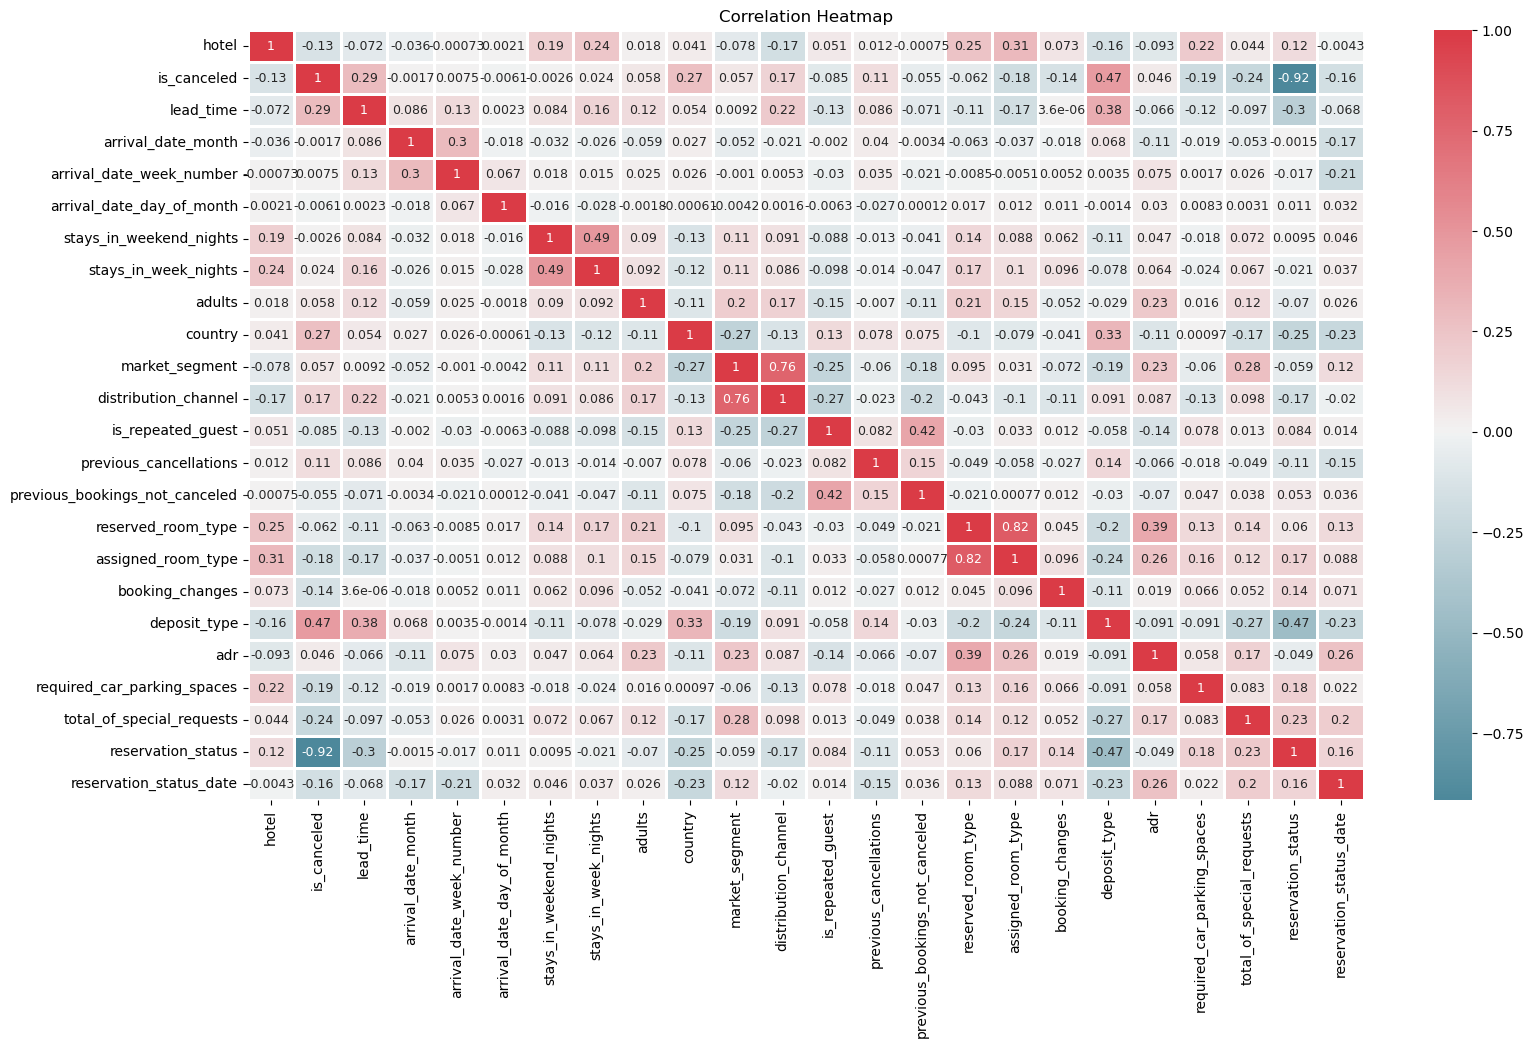

In [ ]:
#Representing Matrix as a plot (heatmap)
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(18,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(),center=0, linewidths=0.8,cmap=cmap,annot=True, annot_kws={"size": 9})
plt.title('Correlation Heatmap')

We observe that is_canceled and deposit_type as well as is_cancelled and reservation_status are highly correlated

## Pairplot
Seaborn's pairplot() function is a powerful visualization tool that allows you to plot pairwise relationships between multiple variables in a dataset. Each variable in the dataset is plotted against every other variable, resulting in a grid of scatter plots and histograms.

nterpreting the pairplot involves analyzing the scatter plots to determine the strength and direction of the relationship between each pair of variables.

If there is a strong linear relationship between two variables, the scatter plot will show a clear pattern or trend, with the points clustering around a straight line. If there is no relationship between the variables, the scatter plot will show a random distribution of points.

The color and shape of the points in the scatter plot can also be used to represent additional variables in the dataset. For example, you can use the hue parameter of the pairplot() function to color the points based on a categorical variable in the dataset, or use the size parameter to vary the size of the points based on a numerical variable.

In addition to analyzing the scatter plots, you can also use the histograms along the diagonal of the grid to examine the distribution of each variable in the dataset. This can help you identify outliers or other features of the data that may be important for understanding the relationships between variables.

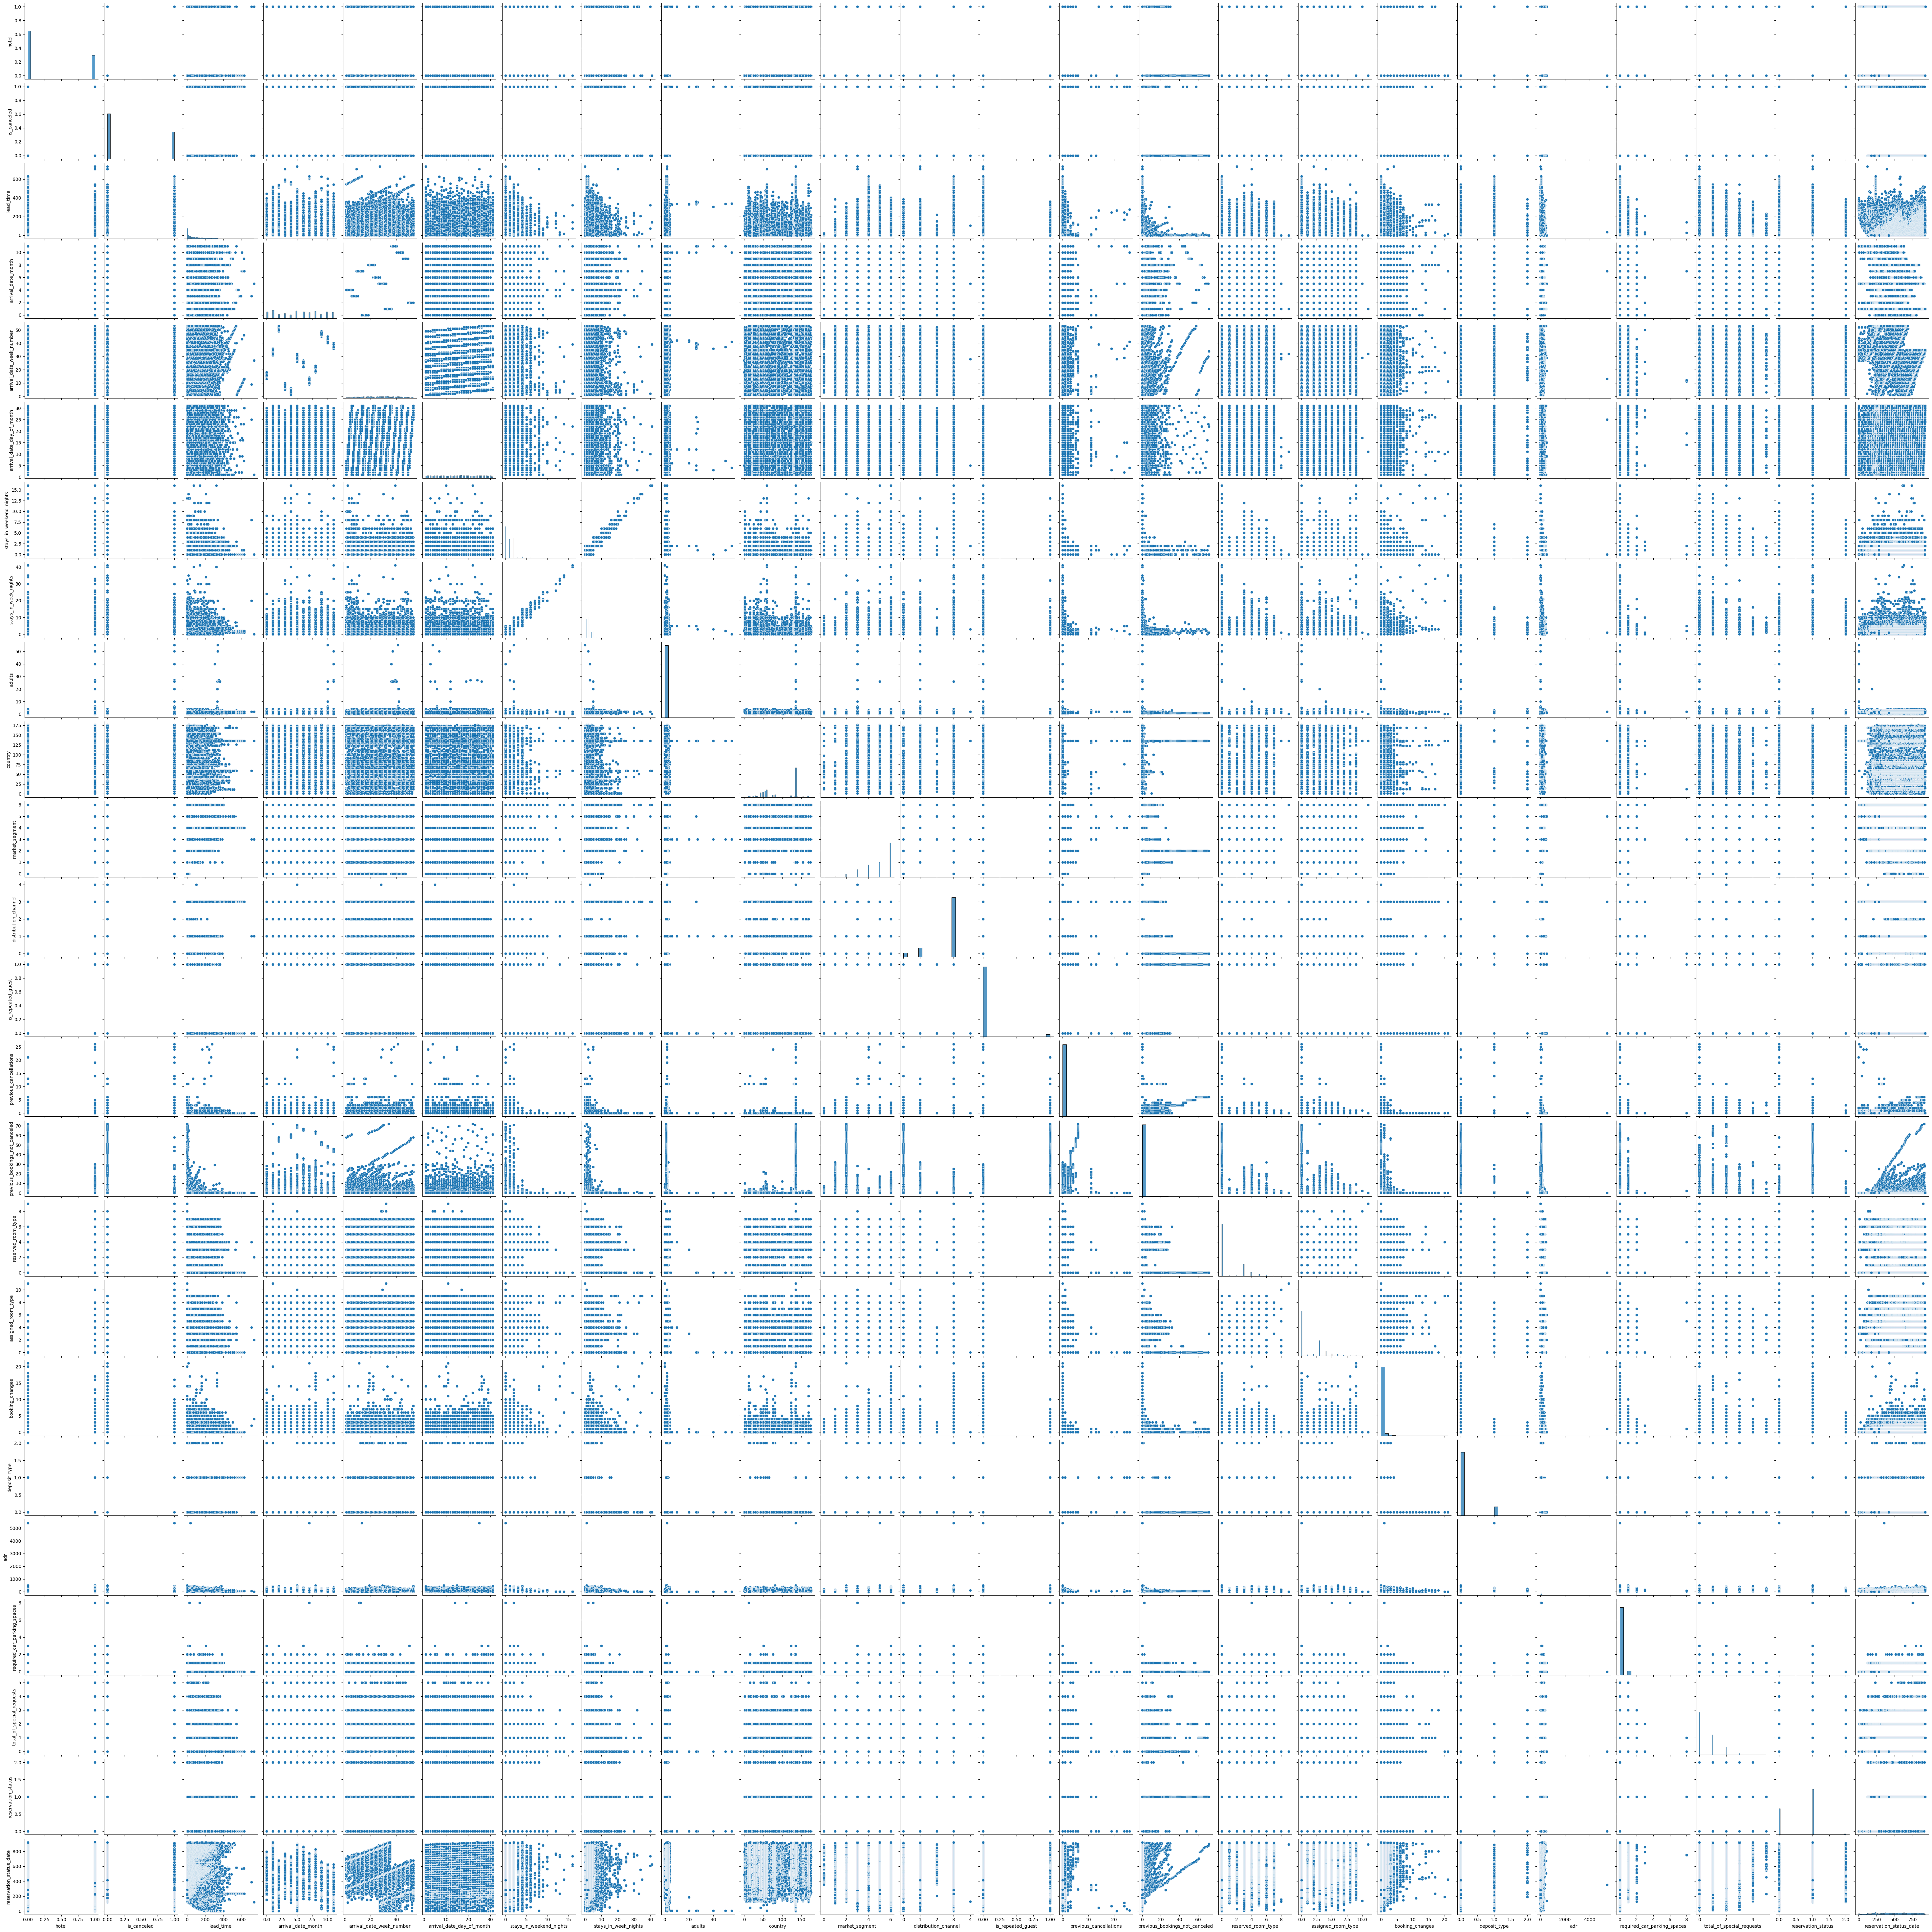

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(data) 

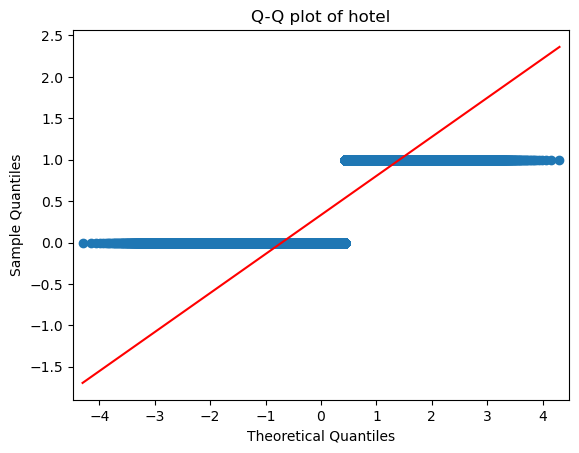

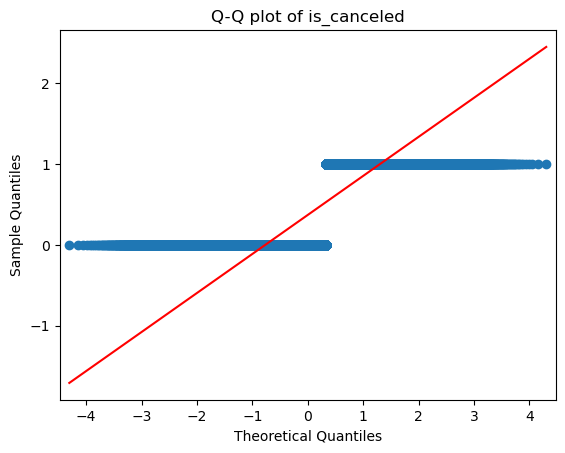

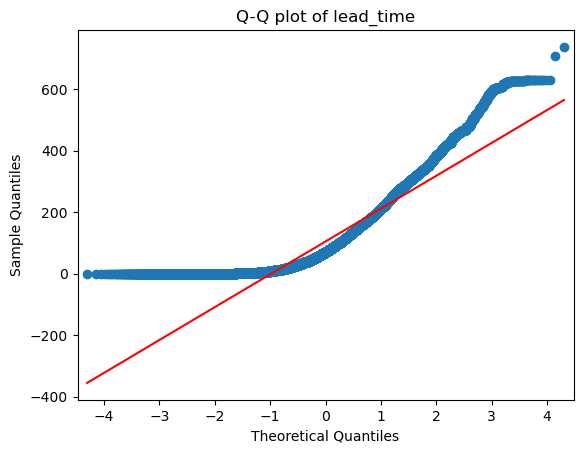

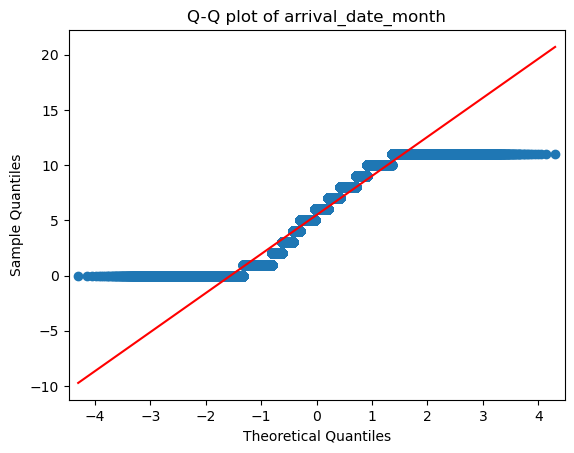

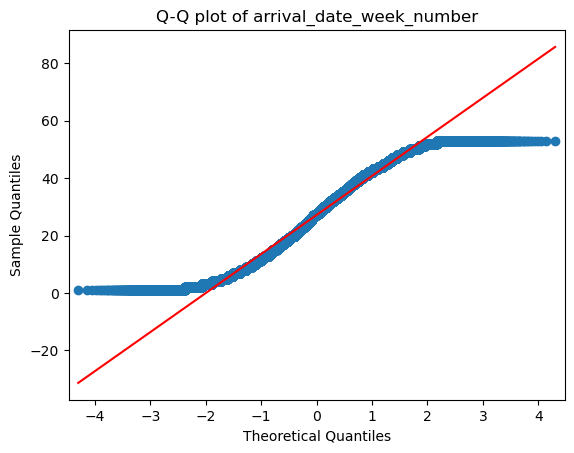

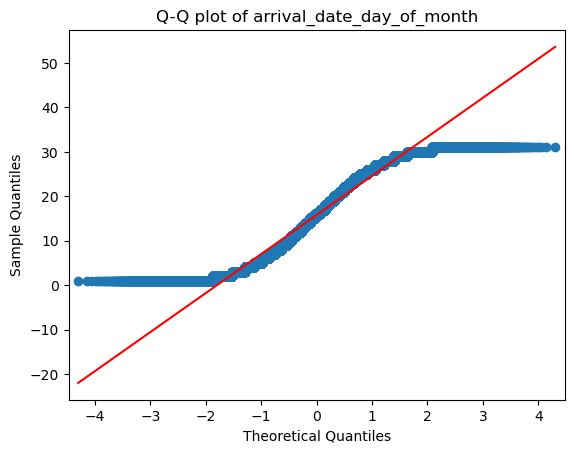

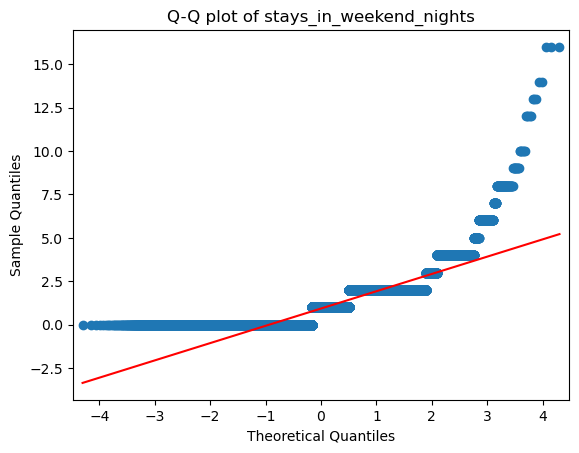

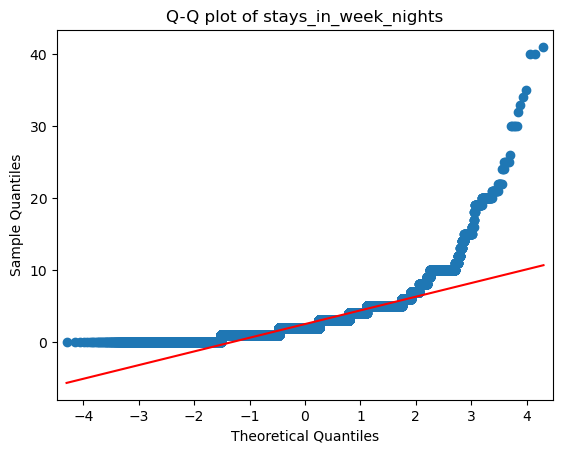

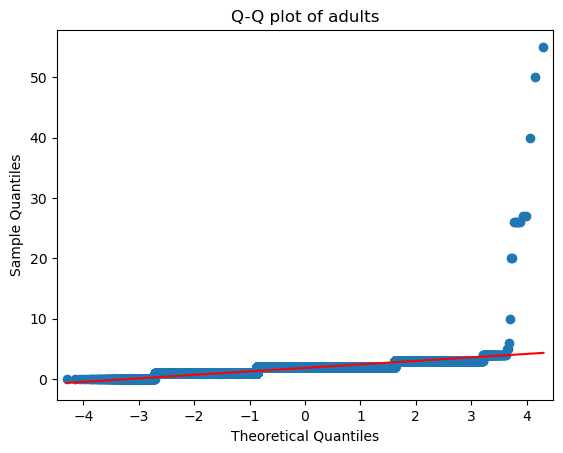

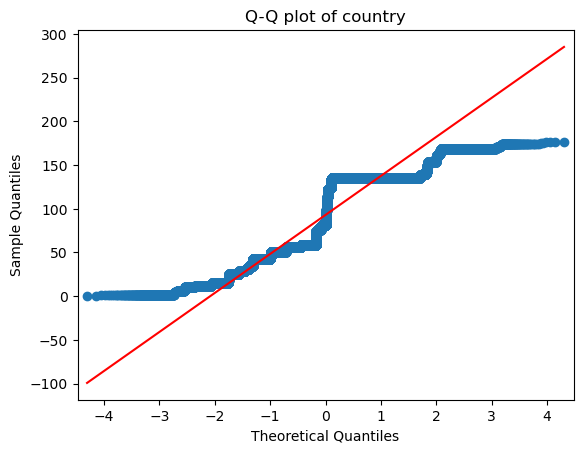

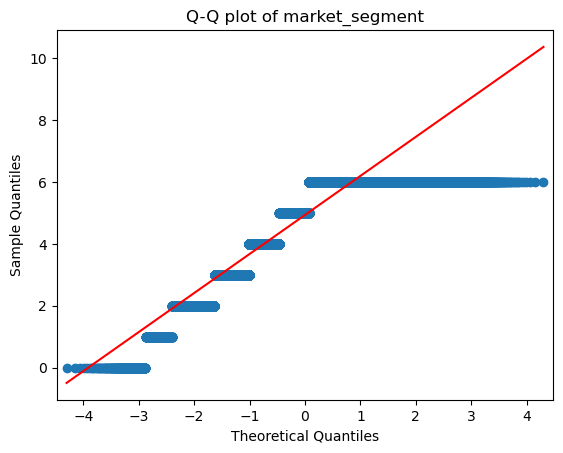

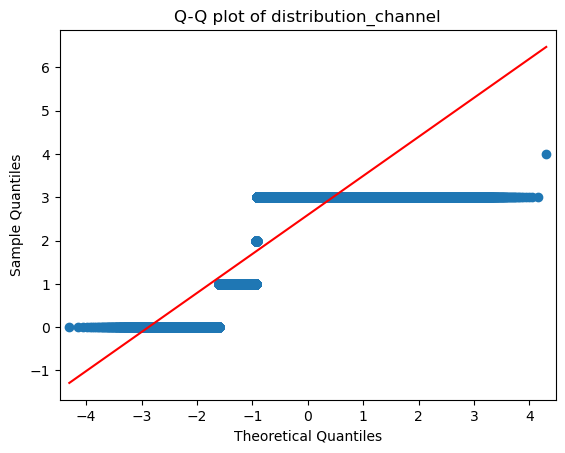

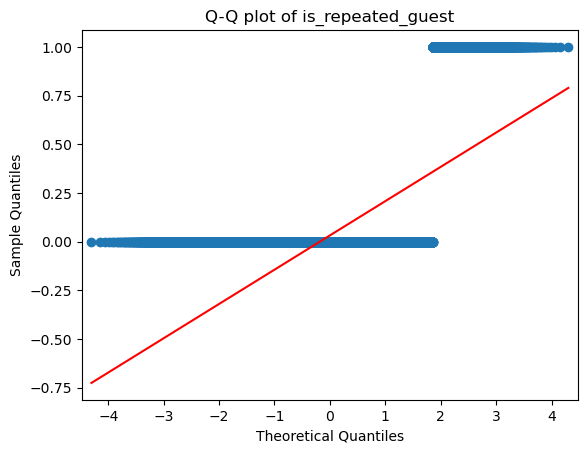

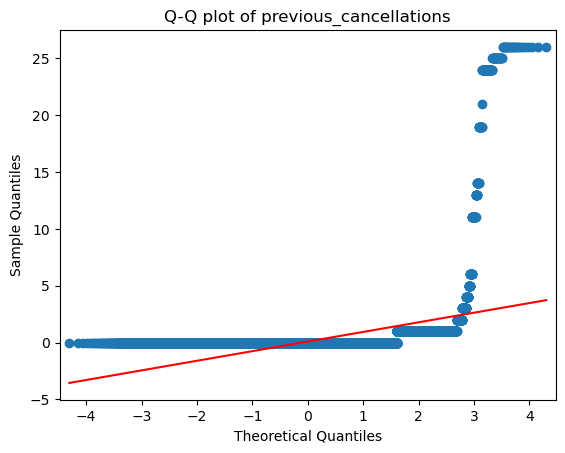

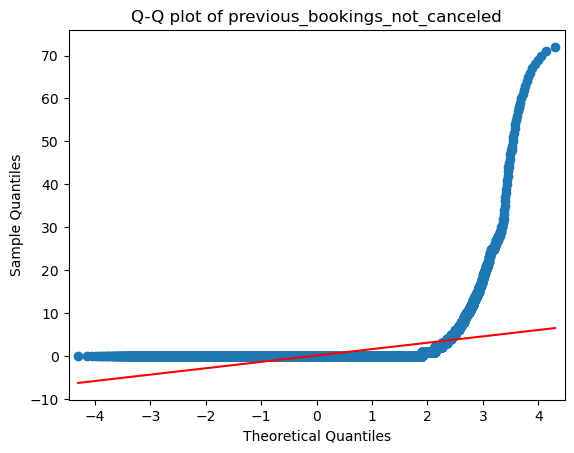

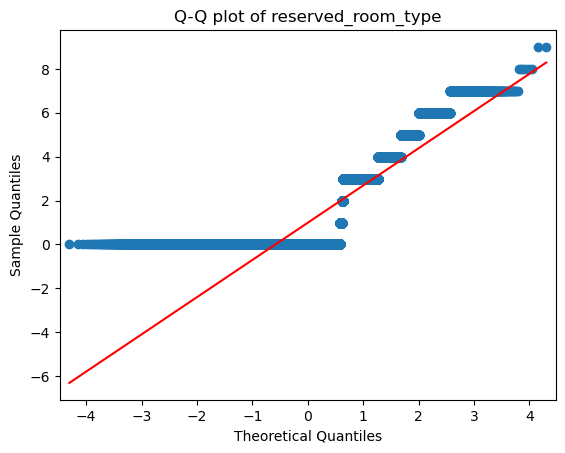

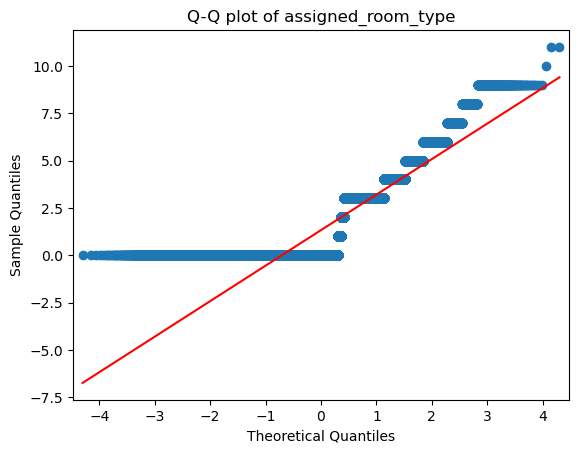

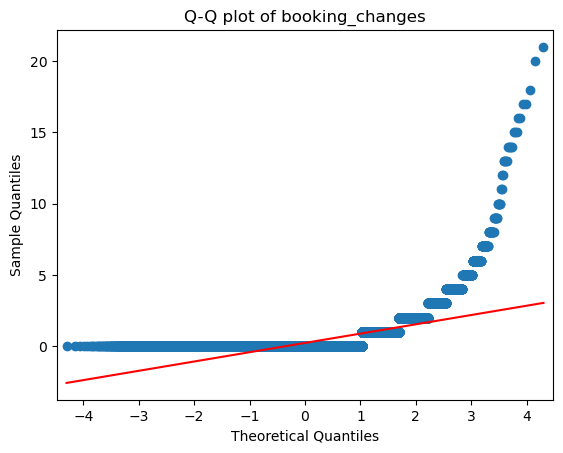

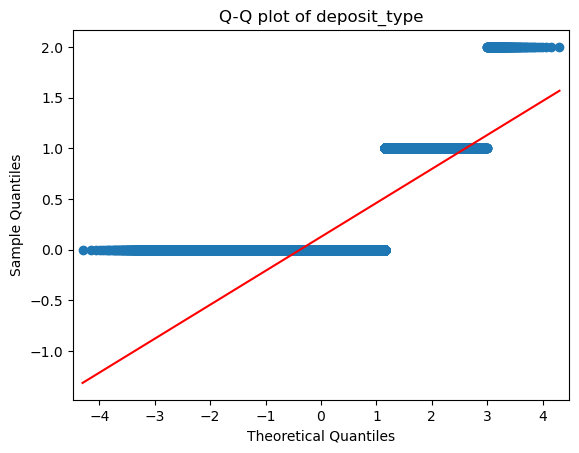

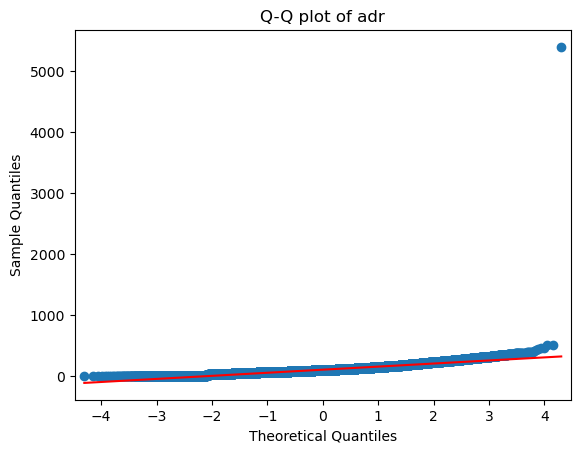

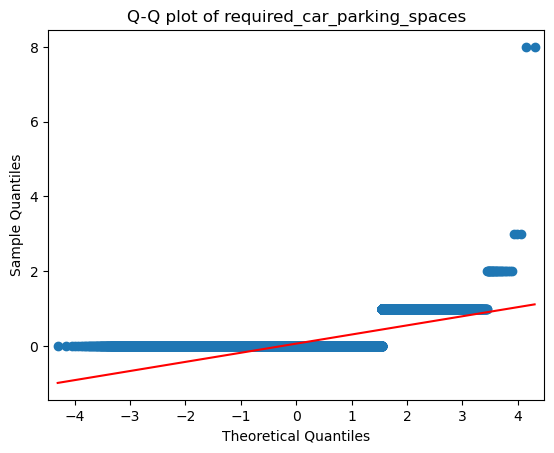

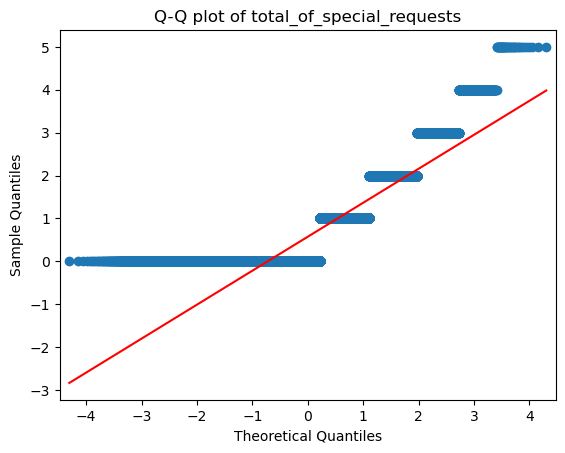

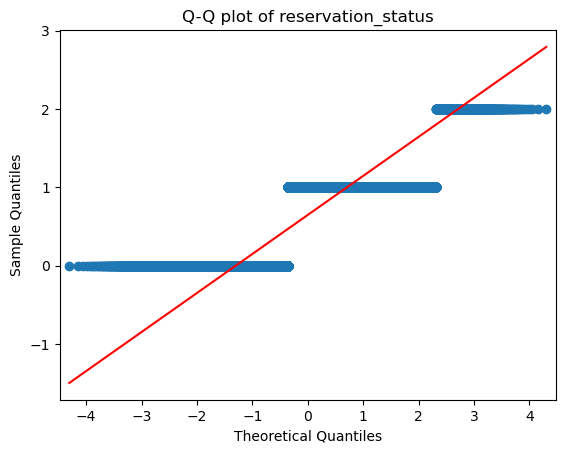

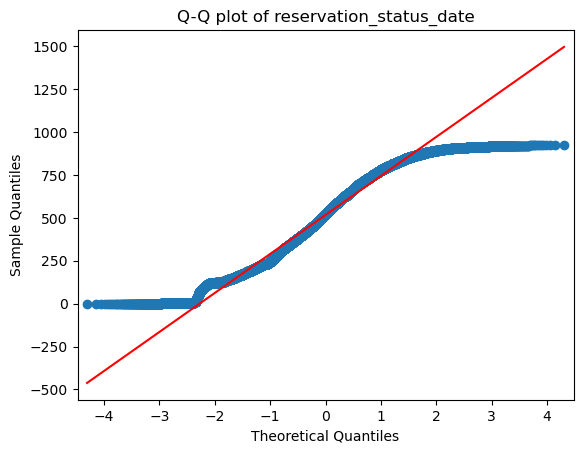

In [ ]:
import statsmodels.api as sm
for col in data.columns:
    sm.qqplot(data[col], line='s')
    plt.title('Q-Q plot of ' + col)
    plt.show()

We observe that lead_time, adr, country and reservation_status_date are normally distributed

## Running H20 AutoML

In [ ]:
df = h2o.H2OFrame(
    data
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

hotel    is_canceled    lead_time    arrival_date_month    arrival_date_week_number    arrival_date_day_of_month    stays_in_weekend_nights    stays_in_week_nights    adults    country    market_segment    distribution_channel    is_repeated_guest    previous_cancellations    previous_bookings_not_canceled    reserved_room_type    assigned_room_type    booking_changes    deposit_type    adr    required_car_parking_spaces    total_of_special_requests    reservation_status    reservation_status_date
-------  -------------  -----------  --------------------  --------------------------  ---------------------------  -------------------------  ----------------------  --------  ---------  ----------------  ----------------------  -------------------  ------------------------  --------------------------------  --------------------  --------------------  -----------------  --------------  -----  -----------------------------  ---------------------------  --------------------  -------------------------
      1              0          342                     5                          27                            1                          0                       0         2        135                 3                       1                    0                         0                                 0                     2                     2                  3               0    0                                0                            0                     1                        121
      1              0          737                     5                          27                            1                          0                       0         2        135                 3                       1                    0                         0                                 0                     2                     2                  4               0    0                                0                            0                     1                        121
      1              0            7                     5                          27                            1                          0                       1         1         59                 3                       1                    0                         0                                 0                     0                     2                  0               0   75                                0                            0                     1                        122
      1              0           13                     5                          27                            1                          0                       1         1         59                 2                       0                    0                         0                                 0                     0                     0                  0               0   75                                0                            0                     1                        122
      1              0           14                     5                          27                            1                          0                       2         2         59                 6                       3                    0                         0                                 0                     0                     0                  0               0   98                                0                            1                     1                        123
      1              0           14                     5                          27                            1                          0                       2         2         59                 6                       3                    0                         0                                 0                     0                     0                  0               0   98                                0                            1            

In [ ]:
df.describe()

Rows:118898
Cols:24

hotel                is_canceled         lead_time           arrival_date_month    arrival_date_week_number    arrival_date_day_of_month    stays_in_weekend_nights    stays_in_week_nights    adults              country            market_segment      distribution_channel    is_repeated_guest    previous_cancellations    previous_bookings_not_canceled    reserved_room_type    assigned_room_type    booking_changes     deposit_type         adr                 required_car_parking_spaces    total_of_special_requests    reservation_status    reservation_status_date
-------  -------------------  ------------------  ------------------  --------------------  --------------------------  ---------------------------  -------------------------  ----------------------  ------------------  -----------------  ------------------  ----------------------  -------------------  ------------------------  --------------------------------  --------------------  --------------------  ------------------  -------------------  ------------------  -----------------------------  ---------------------------  --------------------  -------------------------
type     int                  int                 int                 int                   int                         int                          int                        int                     int                 int                int                 int                     int                  int                       int                               int                   int                   int                 int                  real                int                            int                          int                   int
mins     0.0                  0.0                 0.0                 0.0                   1.0                         1.0                          0.0                        0.0                     0.0                 0.0                0.0                 0.0                     0.0                  0.0                       0.0                               0.0                   0.0                   0.0                 0.0                  -6.38               0.0                            0.0                          0.0                   0.0
mean     0.3330249457518209   0.3713519150868812  104.31143501152314  5.490437181449657     27.166554525727943          15.800879745664288           0.9288970377971026         2.5021446954532416      1.8583912260929514  92.9886625510945   4.934784437080527   2.5909855506400454      0.03201063096099178  0.08714191996501201       0.13163383740685294               0.9899577789365639    1.32521993641609      0.2211811805076625  0.12529226732156962  102.00324252720849  0.061884977039143065           0.5716832915608325           0.6488839173072736    517.0537855977417
maxs     1.0                  1.0                 737.0               11.0                  53.0                        31.0                         16.0                       41.0                    55.0                176.0              6.0                 4.0                     1.0                  26.0                      72.0                              9.0                   11.0                  21.0                2.0                  5400.0              8.0                            5.0                          2.0                   925.0
sigma    0.47129735775283504  0.4831683285456409  106.90330923721032  3.5349785429859364    13.589970818022914          8.780324413499757            0.9962160236742577         1.9001677253551046      0.5785755638794188  44.67641406398706  1.2613391213014997  0.9016229506873467      0.17602900635458016  0.8458689454749673        1.4846719260602208                1.6961506916525906    1.8755721275952797    0.652785038875792   0.33514188720324367  50.48586208167273   0.2441722633517482             0.7926779531658189           0.49806776444997203   227.55348810323085
zeros    79302                74745               6

In [ ]:
df.types

{'hotel': 'int',
 'is_canceled': 'int',
 'lead_time': 'int',
 'arrival_date_month': 'int',
 'arrival_date_week_number': 'int',
 'arrival_date_day_of_month': 'int',
 'stays_in_weekend_nights': 'int',
 'stays_in_week_nights': 'int',
 'adults': 'int',
 'country': 'int',
 'market_segment': 'int',
 'distribution_channel': 'int',
 'is_repeated_guest': 'int',
 'previous_cancellations': 'int',
 'previous_bookings_not_canceled': 'int',
 'reserved_room_type': 'int',
 'assigned_room_type': 'int',
 'booking_changes': 'int',
 'deposit_type': 'int',
 'adr': 'real',
 'required_car_parking_spaces': 'int',
 'total_of_special_requests': 'int',
 'reservation_status': 'int',
 'reservation_status_date': 'int'}

In [ ]:
df.shape

(118898, 24)

In [ ]:
# converting categorical data to numeric data
df['is_canceled'] = df['is_canceled'].asfactor()

In [ ]:
# Set target and predictor variables
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(95007, 24)
(23891, 24)


In [ ]:
X = df.columns
print(X)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# Set target and predictor variables
y = "is_canceled"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_7_20230228_233550


Model Summary: 
    number_of_trees
--  -----------------
    5

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.01023589190538071
RMSE: 0.10117258475190159
LogLoss: 0.1066613495816316
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8120689988136292
       0      1      Error    Rate
-----  -----  -----  -------  -------------
0      59634  0      0        (0.0/59634.0)
1      0      35373  0        (0.0/35373.0)
Total  59634  35373  0        (0.0/95007.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.812069     1         5
max f2                       0.812069     1         5
max f0point5                 0.812069     1         5
max accuracy                 0.812069     1         5
max precision                0.898855     1         0
max recall                   0.812069     1         5
max specificity              0.898855     1         0
max absolute_mcc             0.812069     1         5
max min_per_class_accuracy   0.812069     1         5
max mean_per_class_accuracy  0.812069     1         5
max tns                      0.898855     59634     0
max fns                      0.898855     12581     0
max fps                      0.101125     59634     9
max tps                      0.812069     35373     5
max tnr                      0.898855     1         0
max fnr                      0.898855     0.355667  0
max fpr                      0.101125     1         9
max tpr                      0.812069     1         5

Gains/Lift Table: Avg response rate: 37.23 %, avg score: 39.81 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.239898                    0.898855           2.68586    2.68586            1                0.898855  1                           0.898855            0.644333        0.644333                   168.586   168.586            0.644333
2        0.362236                    0.898844           2.68586    2.68586            1                0.898844  1                           0.898851            0.328584        0.972917                   168.586   168.586            0.972917
3        1                           0.101125           0.0424653  1                  0.0158107        0.113723  0.37232                     0.398125            0.0270828       1                          -95.7535  0                  0

ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.0022481548245530895
RMSE: 0.04741471105630709
LogLoss: 0.04404684174478129
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8698427081108093
       0      1      Error    Rate
-----  -----  -----  -------  -------------
0      59634  0      0        (0.0/59634.0)
1      0      35373  0        (0.0/35373.0)
Total  59634  35373  0        (0.0/95007.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       0.869843     1        111
max f2                       0.869843     1        111
max f0point5                 0.869843     1        111
max accuracy                 0.869843     1        111
max precision  

AutoML is a powerful tool that allows you to automate the process of selecting and tuning machine learning models for a given dataset. The exact parameters of an AutoML tool may vary depending on the implementation, but here are some common parameters and their meanings:

1. time_limit: This parameter specifies the maximum amount of time that AutoML should spend searching for the best model. It is usually specified in seconds, minutes, or hours.

2. max_models: This parameter specifies the maximum number of models that AutoML should evaluate before returning the best one. It can be used as an alternative to the time_limit parameter if you want to limit the number of models that AutoML evaluates.

3. model: This parameter specifies the type of machine learning model to use for the task. AutoML tools typically support a variety of models, such as linear regression, decision trees, random forests, and neural networks.

4. metric: This parameter specifies the evaluation metric that AutoML should use to assess the performance of each model. Common metrics include accuracy, precision, recall, and F1 score.

5. search_strategy: This parameter specifies the algorithm that AutoML should use to search for the best model. Common strategies include random search, grid search, and Bayesian optimization.

6. preprocessing: This parameter specifies the preprocessing steps that AutoML should apply to the data before training the model. Common preprocessing steps include scaling, normalization, and feature engineering.

7. validation_strategy: This parameter specifies the method that AutoML should use to validate the performance of each model. Common validation strategies include cross-validation, holdout validation, and time-series validation.

8. ensemble_size: This parameter specifies the number of models to include in the final ensemble. AutoML tools typically use an ensemble of models to improve performance and reduce overfitting.

These are just a few examples of the parameters that you might encounter when using an AutoML tool. The exact parameters and their meanings may vary depending on the implementation and the specific problem being solved.

When you use an AutoML tool to build a machine learning model, the tool will typically return several performance metrics that can be used to evaluate the quality of the model. Here are some common metrics that you might see and their meanings:

1. R-squared (R²): R-squared is a measure of how well the model fits the data. It represents the proportion of the variance in the dependent variable that is explained by the independent variables. R-squared ranges from 0 to 1, with higher values indicating a better fit.

2. Mean Absolute Error (MAE): MAE is a measure of the average difference between the predicted and actual values of the dependent variable. It is calculated by taking the absolute value of the difference between each predicted and actual value, and then averaging those differences. Lower values of MAE indicate better performance.

3. Root Mean Squared Error (RMSE): RMSE is a measure of the average magnitude of the errors in the predictions. It is calculated by taking the square root of the mean of the squared differences between the predicted and actual values. Lower values of RMSE indicate better performance.

4. Mean Squared Error (MSE): MSE is a measure of the average squared difference between the predicted and actual values. It is calculated by taking the mean of the squared differences between each predicted and actual value. Like RMSE, lower values of MSE indicate better performance.

5. Accuracy: Accuracy is a measure of how well the model predicts the correct class for each observation. It is calculated by dividing the number of correct predictions by the total number of predictions. Higher values of accuracy indicate better performance.

6. Precision and Recall: Precision and recall are measures of the quality and completeness of the model's predictions. Precision is the proportion of true positives (correct predictions) among all positive predictions, while recall is the proportion of true positives among all actual positives. Higher values of precision and recall indicate better performance.

These are just a few examples of the performance metrics that you might see when using an AutoML tool. The specific metrics and their meanings may vary depending on the implementation and the specific problem being solved.

In [ ]:
# View the AutoML Leaderboard
print(aml.leaderboard)

model_id                                                   auc      logloss    aucpr    mean_per_class_error         rmse          mse
XGBoost_3_AutoML_7_20230228_233550                           1  0.0440468          1                       0  0.0474147    0.00224815
GBM_2_AutoML_7_20230228_233550                               1  0.00690611         1                       0  0.00805625   6.49032e-05
GBM_5_AutoML_7_20230228_233550                               1  0.272232           1                       0  0.245638     0.0603378
StackedEnsemble_BestOfFamily_3_AutoML_7_20230228_233550      1  0.00365384         1                       0  0.0139382    0.000194275
StackedEnsemble_BestOfFamily_1_AutoML_7_20230228_233550      1  0.00080073         1                       0  0.000866465  7.50761e-07
XGBoost_2_AutoML_7_20230228_233550                           1  0.000360179        1                       0  0.00115288   1.32912e-06
GBM_4_AutoML_7_20230228_233550                            

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is

1. XGBoost_3_AutoML_7_20230228_233550 with an rmse score of 0.00224815.
2. The second-best model is GBM_2_AutoML_7_20230228_233550 with an rmse score of 6.49032e-05.
The models are then listed in descending order based on their rmse scores.

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'XGBoost_3_AutoML_7_20230228_233550': 0, 'GLM_1_AutoML_7_20230228_233550': 14}

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_7_20230228_233550


Model Summary: 
    number_of_trees
--  -----------------
    5

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.01023589190538071
RMSE: 0.10117258475190159
LogLoss: 0.1066613495816316
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8120689988136292
       0      1      Error    Rate
-----  -----  -----  -------  -------------
0      59634  0      0        (0.0/59634.0)
1      0      35373  0        (0.0/35373.0)
Total  59634  35373  0        (0.0/95007.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.812069     1         5
max f2                       0.812069     1         5
max f0point5                 0.812069     1         5
max accuracy          

In [ ]:
best_model.algo

'xgboost'

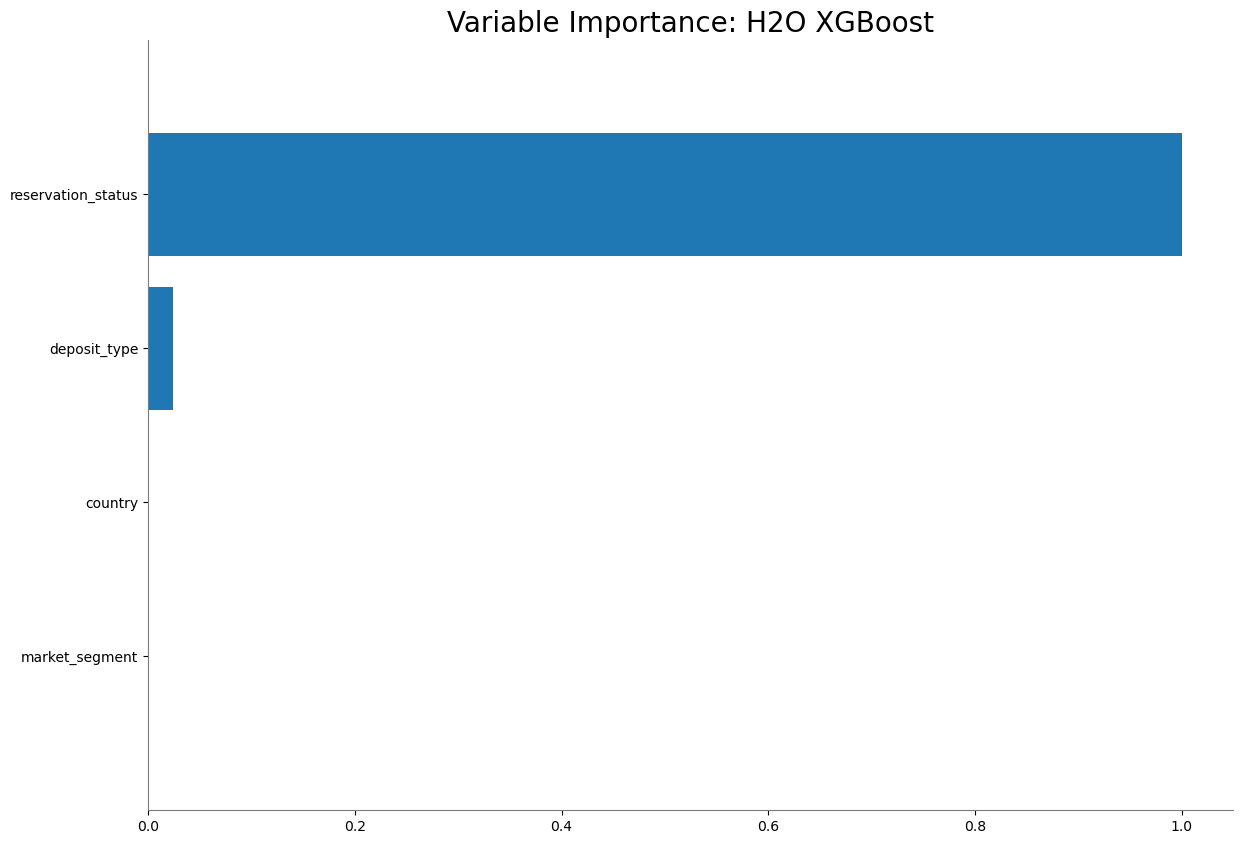

<Figure size 640x480 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

The above graph is a variable Importance Graph on the H20's XGBoost

We can Interpret that reservation_status is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)
previous_cancellations is 0.02 (Think as if it is 2% Important than reservation_status was)

14


<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?


glm


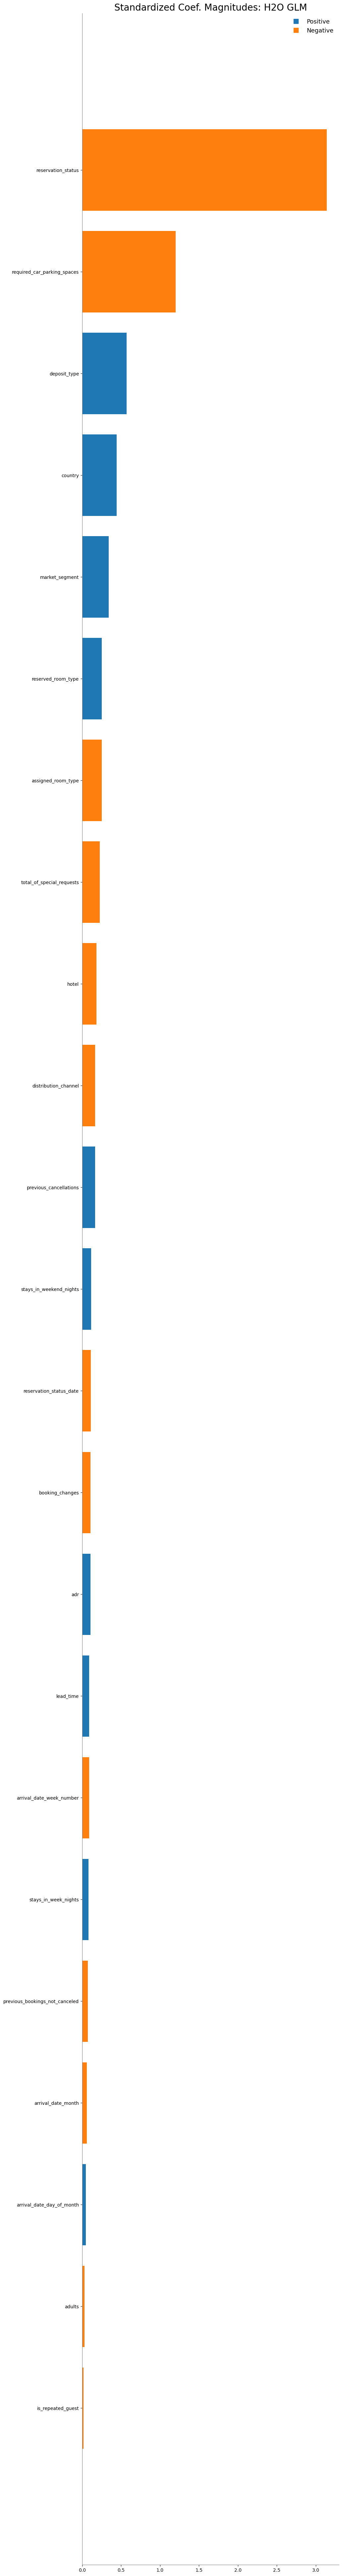

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# Suppress syntax warnings
warnings.simplefilter("ignore", SyntaxWarning)

if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()
    
# Manually adjust the size of the plot
plt.gcf().set_size_inches(10, 100)

# Show the plot
plt.show()

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

In [ ]:
print(best_model.rmse(train=True))

0.10117258475190159


In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [ ]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.010235936960298607,
 'rmse': 0.10117280741532582,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.10666181245096536,
 'auc': 1.0,
 'gini': 1.0}

In [ ]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

       predict        p0        p1
0            0  0.898875  0.101125
1            0  0.898875  0.101125
2            0  0.898875  0.101125
3            0  0.898875  0.101125
4            0  0.898875  0.101125
...        ...       ...       ...
23886        0  0.898875  0.101125
23887        0  0.898875  0.101125
23888        0  0.898875  0.101125
23889        0  0.898875  0.101125
23890        0  0.898875  0.101125

[23891 rows x 3 columns]


In [ ]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

is_canceled
0                0
1                0
2                0
3                0
4                0
...            ...
23886            0
23887            0
23888            0
23889            0
23890            0

[23891 rows x 1 columns]

In [ ]:
print(X)

['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

## Data Report

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_3_AutoML_7_20230228_233550

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8120689988136292
       0      1      Error    Rate
-----  -----  -----  -------  -------------
0      59634  0      0        (0.0/59634.0)
1      0      35373  0        (0.0/35373.0)
Total  59634  35373  0        (0.0/95007.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

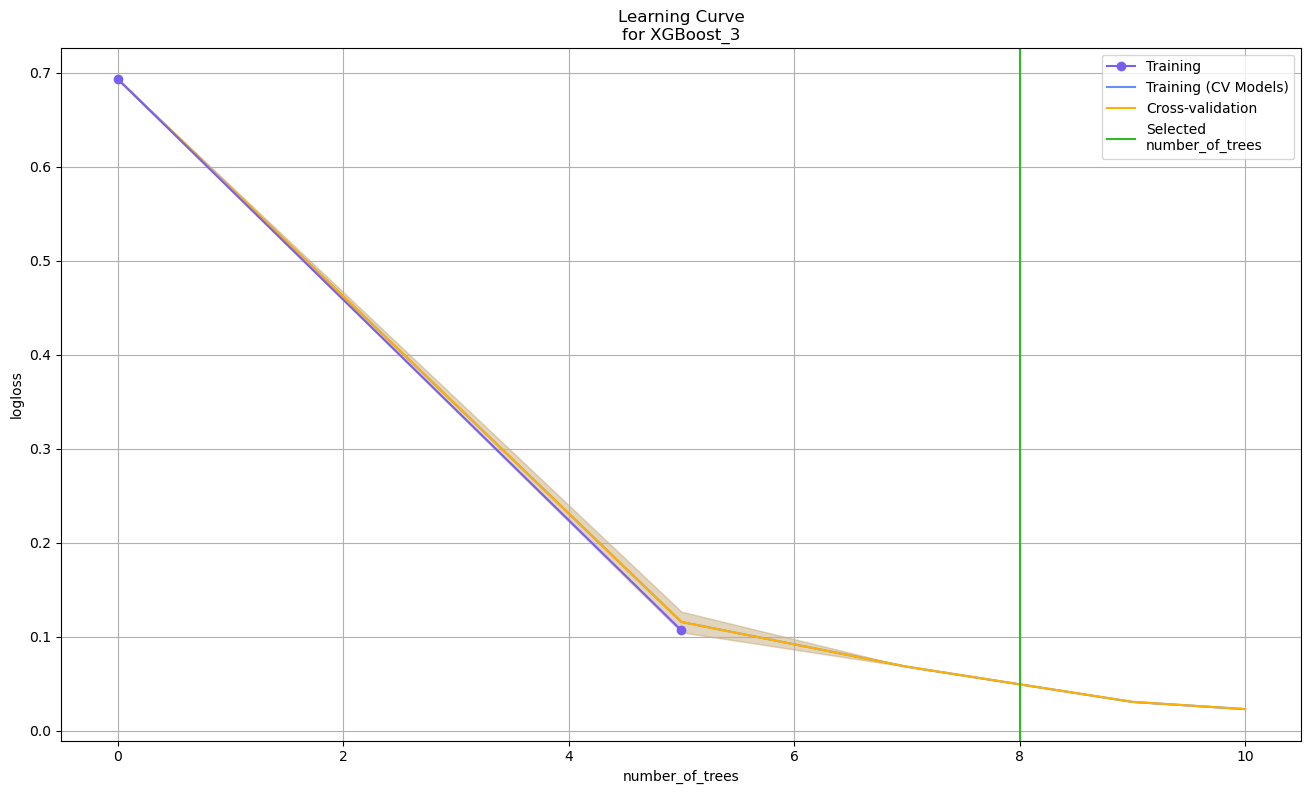

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

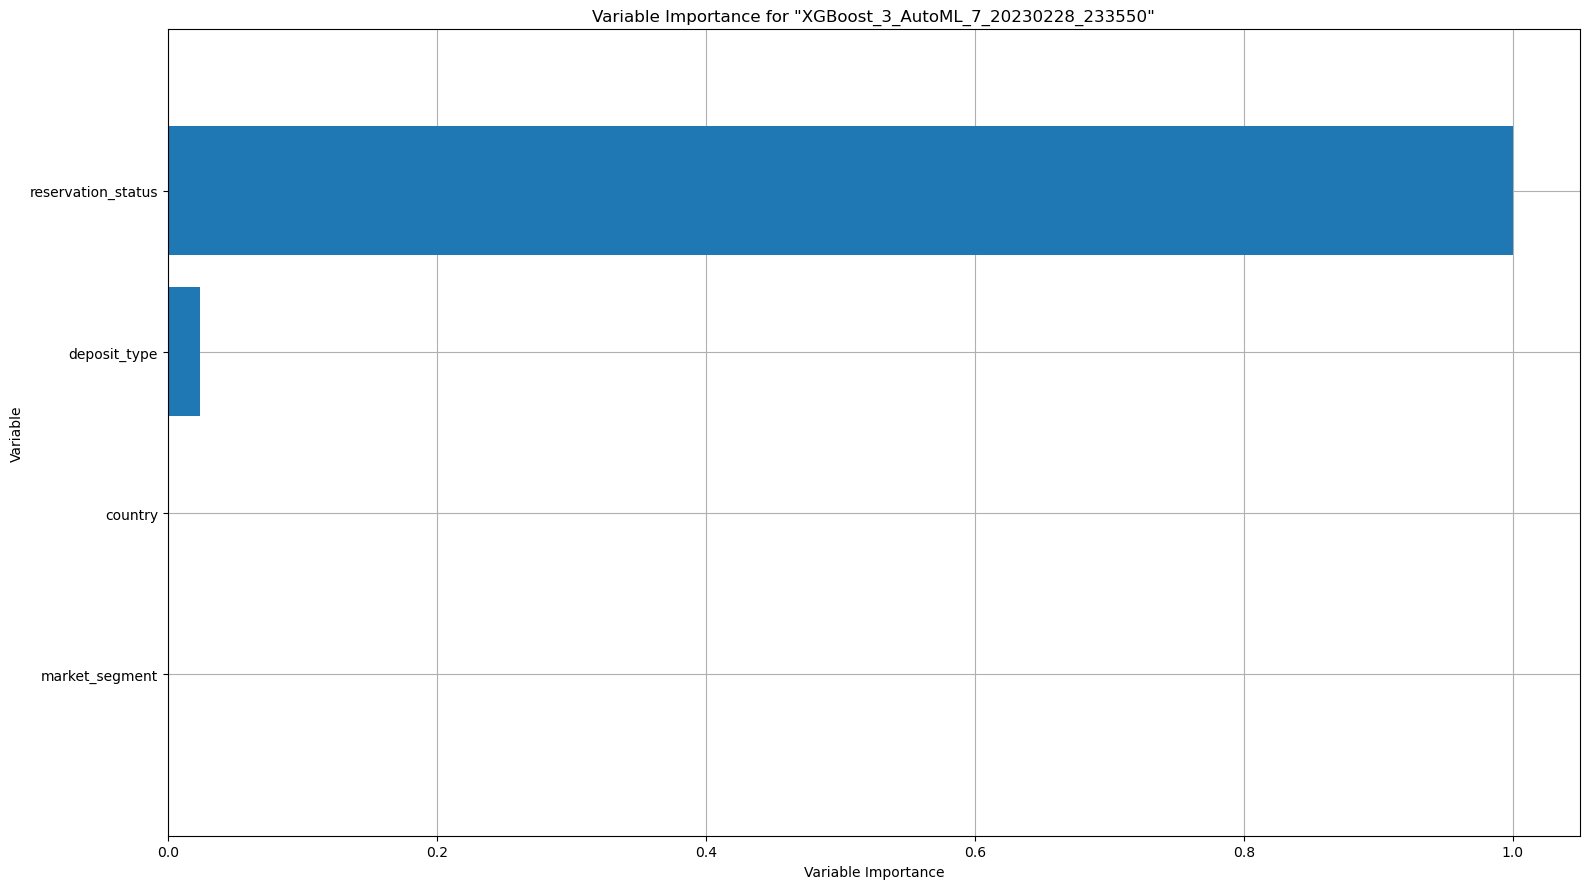

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

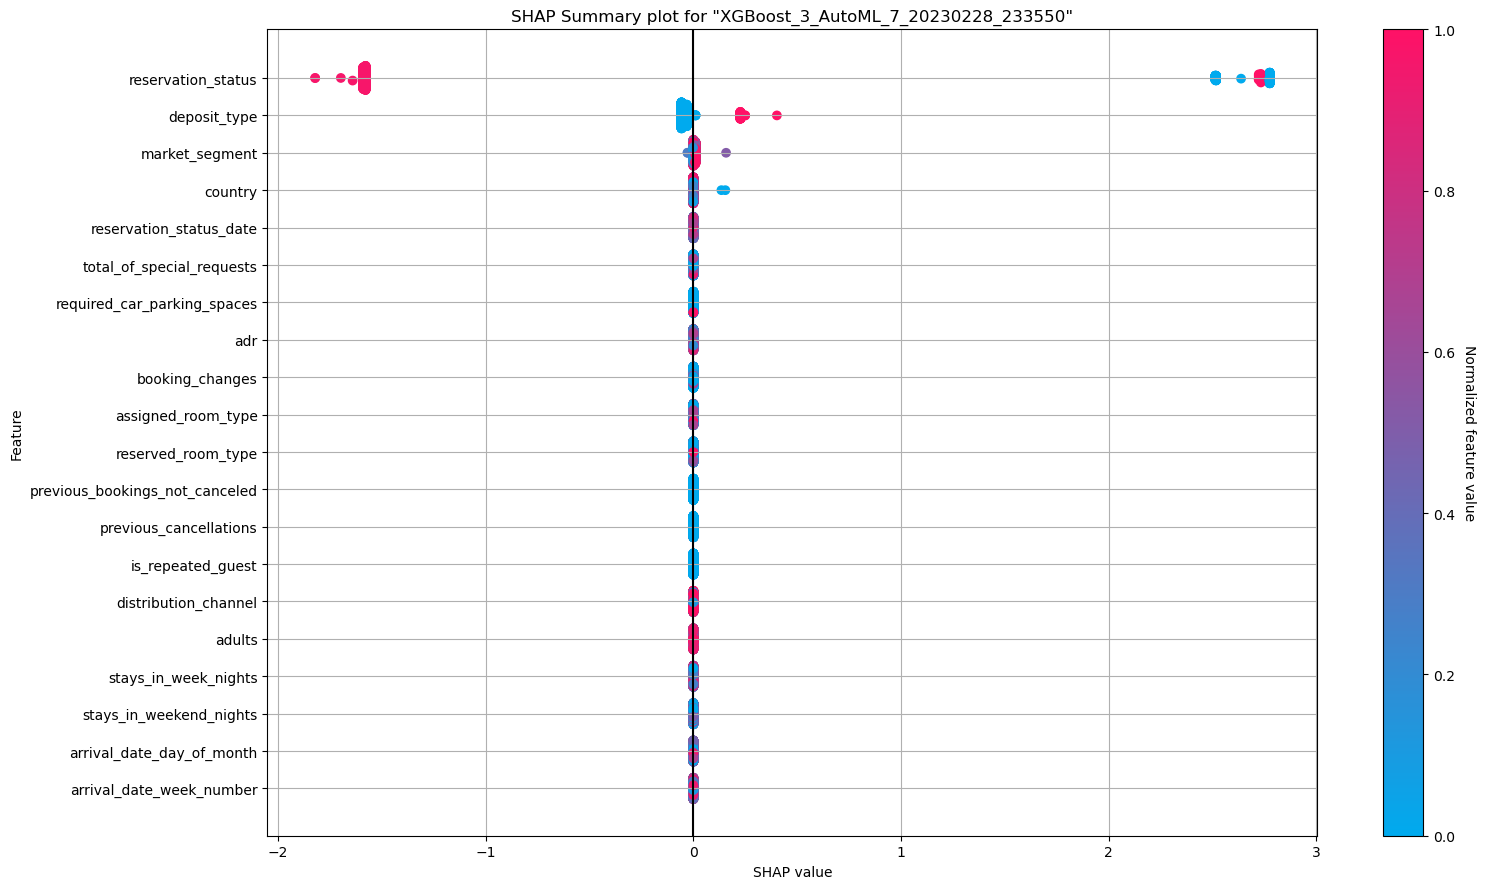

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

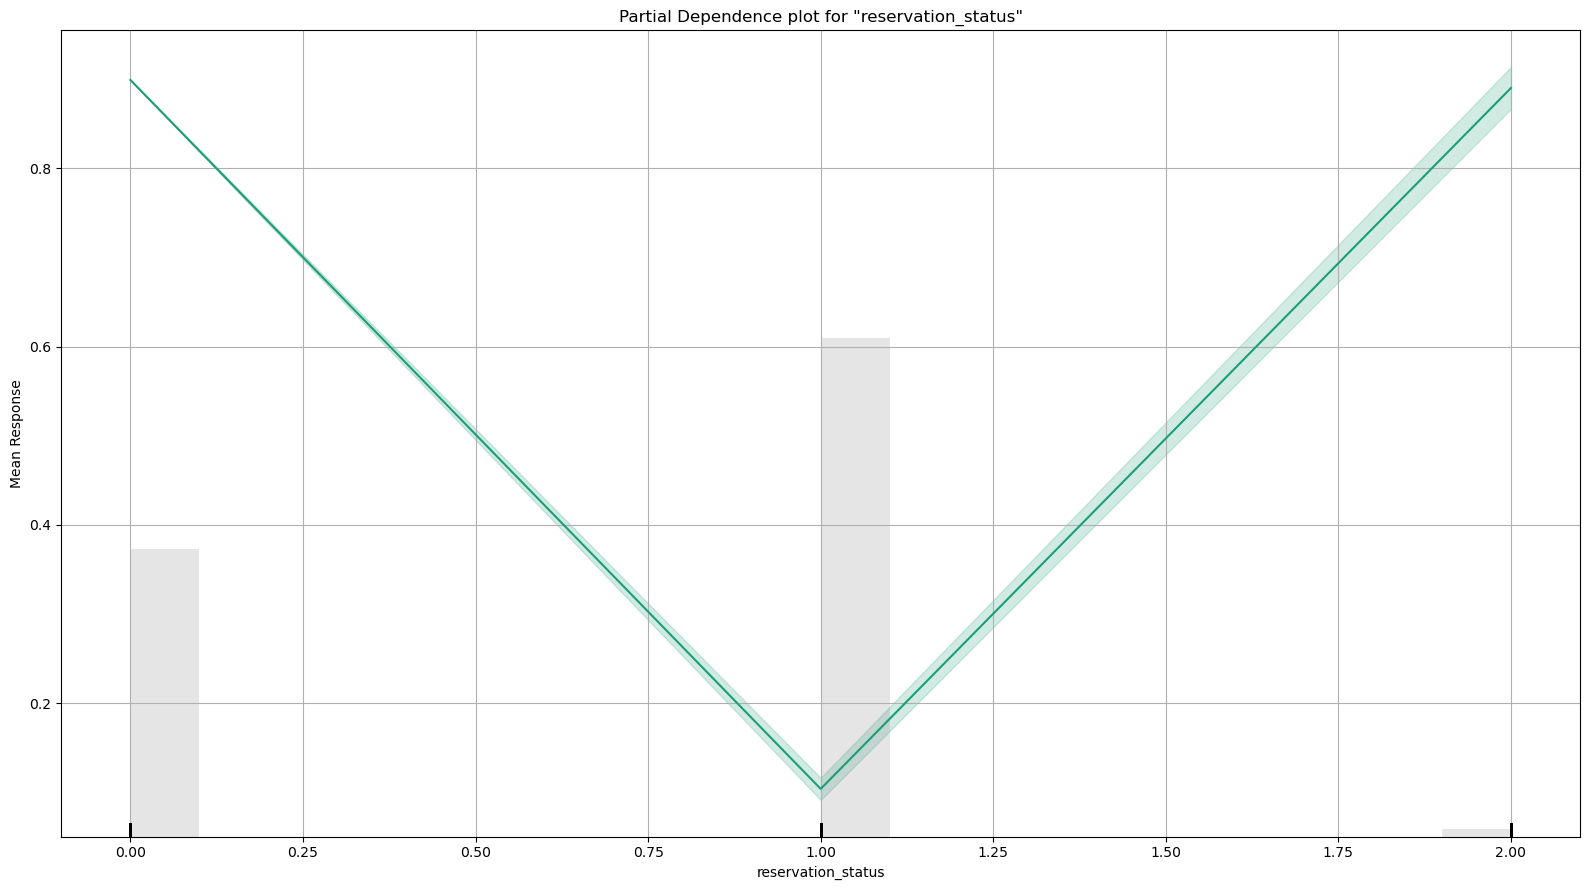

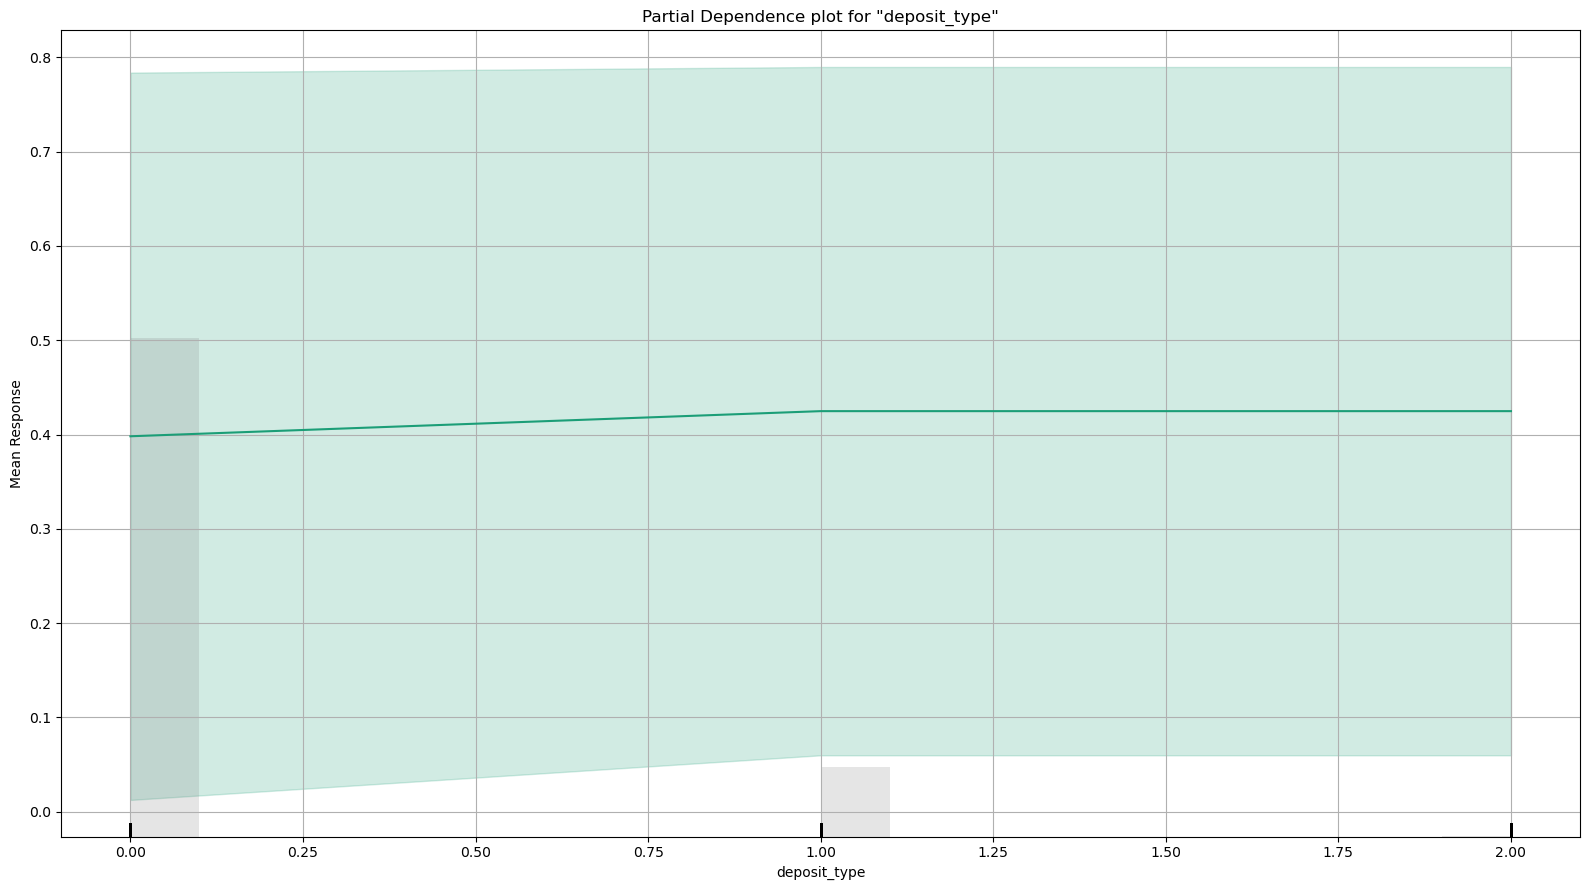

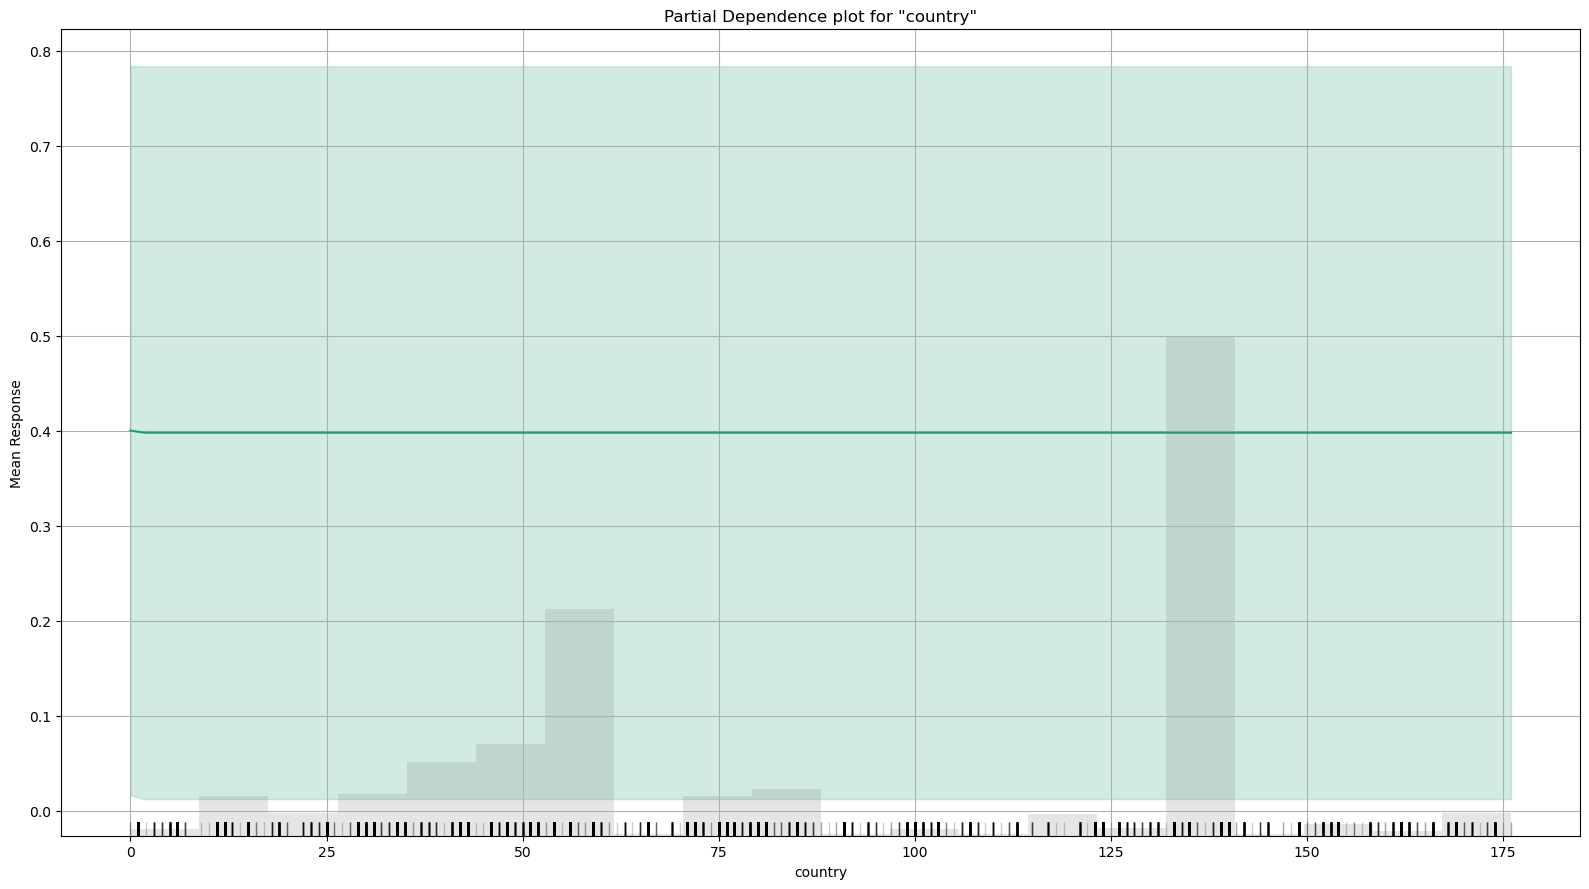

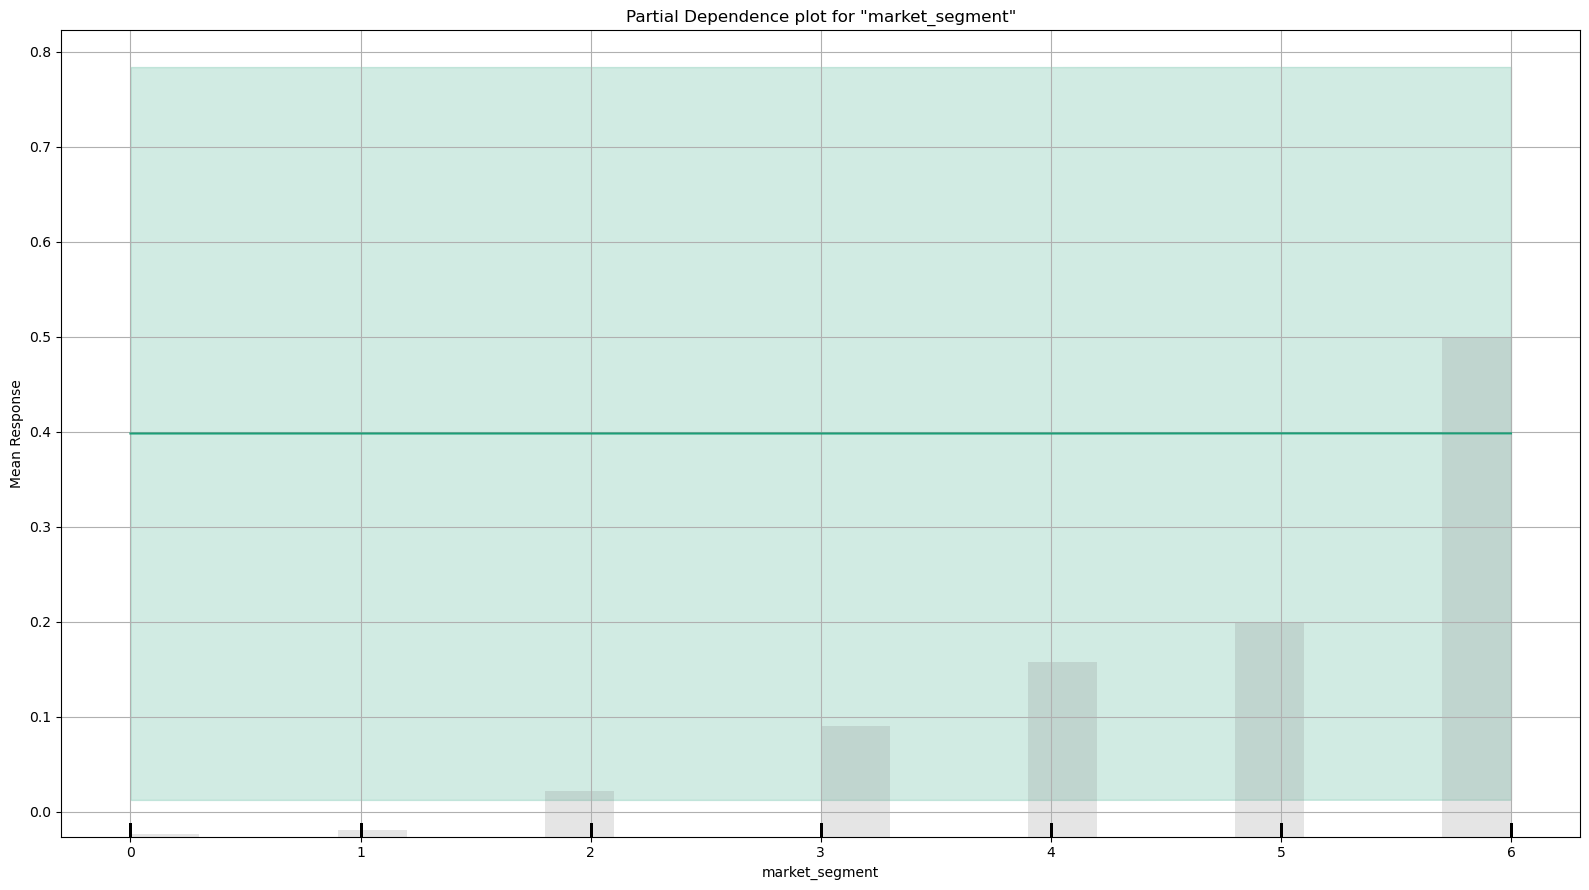

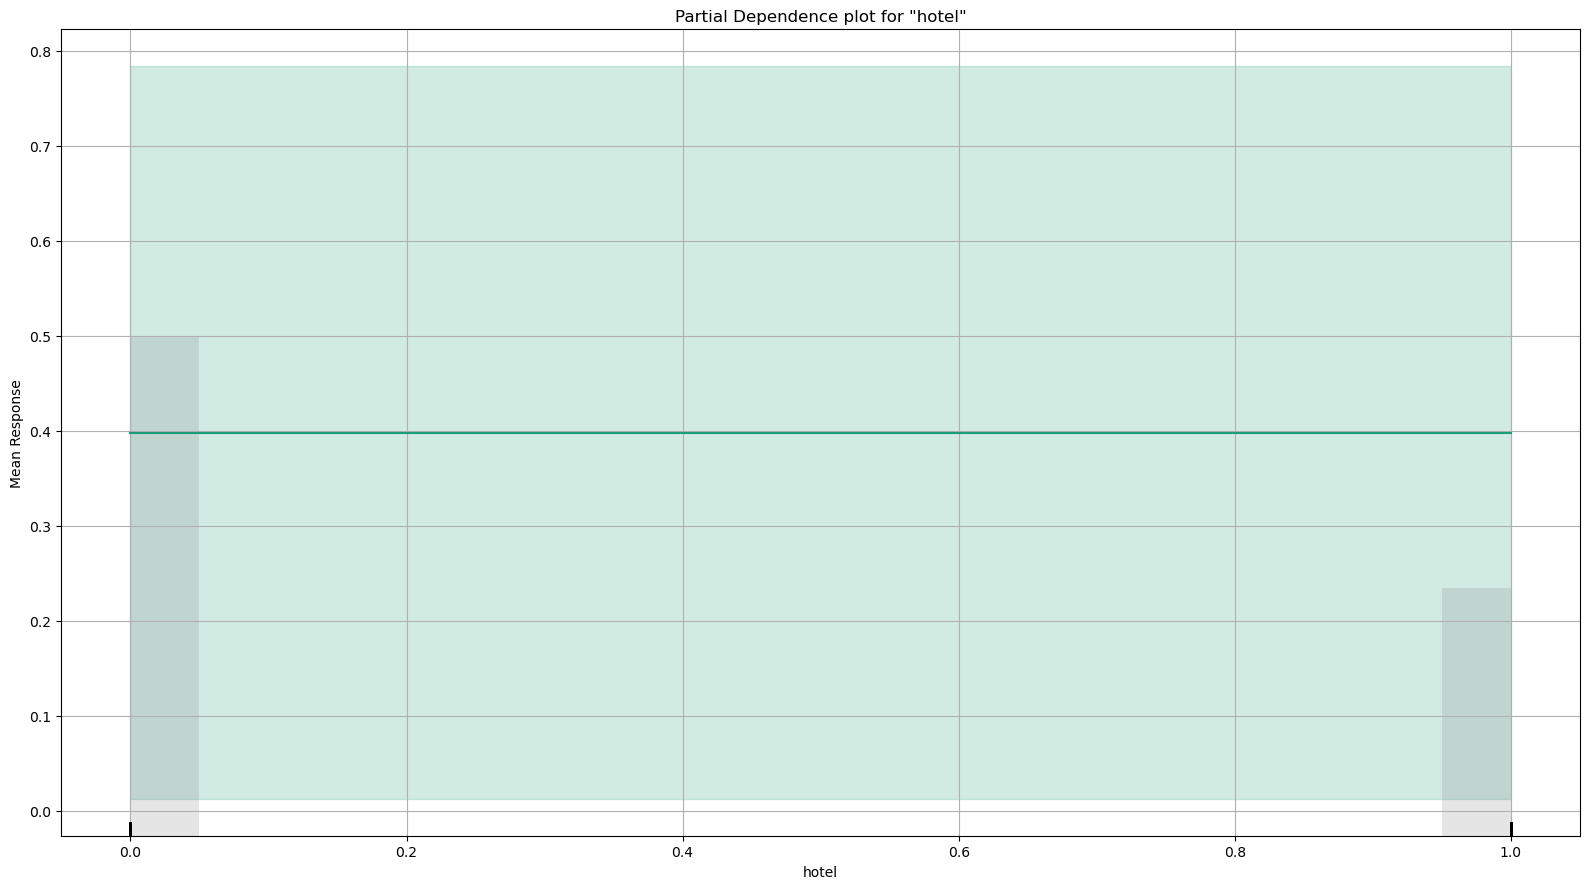

In [ ]:
fi = aml.leader.explain(df_train)

## Hyperparameter Tuning

Hyperparameter tuning is the process of finding the optimal values of the hyperparameters for a given machine learning model. Hyperparameters are model parameters that are set before the training process begins and are not learned during training. Some examples of hyperparameters include learning rate, regularization strength, and the number of hidden layers in a neural network.

There are several techniques for hyperparameter tuning in Python, including:

1. Grid search: Grid search is a brute-force approach that involves specifying a grid of hyperparameter values to search over. The model is then trained and evaluated for each combination of hyperparameters, and the combination that produces the best performance is selected.

2. Random search: Random search is similar to grid search, but instead of searching over a pre-specified grid, it searches over a randomly selected set of hyperparameter values. This approach can be more efficient than grid search when the number of hyperparameters is large.

3. Bayesian optimization: Bayesian optimization is a more sophisticated approach that uses a probabilistic model to select the next set of hyperparameters to try based on the results of previous trials. This approach can be more efficient than grid or random search when the search space is large and the evaluation of each set of hyperparameters is expensive.

4. Gradient-based optimization: Gradient-based optimization involves computing the gradient of the model's performance with respect to the hyperparameters and using gradient descent to find the optimal values. This approach can be more efficient than other methods when the hyperparameters have a smooth and continuous relationship with the model's performance.

Python provides several libraries for hyperparameter tuning, including Scikit-learn, Keras Tuner, Optuna, and Hyperopt. These libraries provide different approaches to hyperparameter tuning and are suitable for different types of machine learning models and applications.

In [ ]:
s = data['is_canceled']

t = data.drop(['is_canceled'], axis = 1)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_

{'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 500}

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

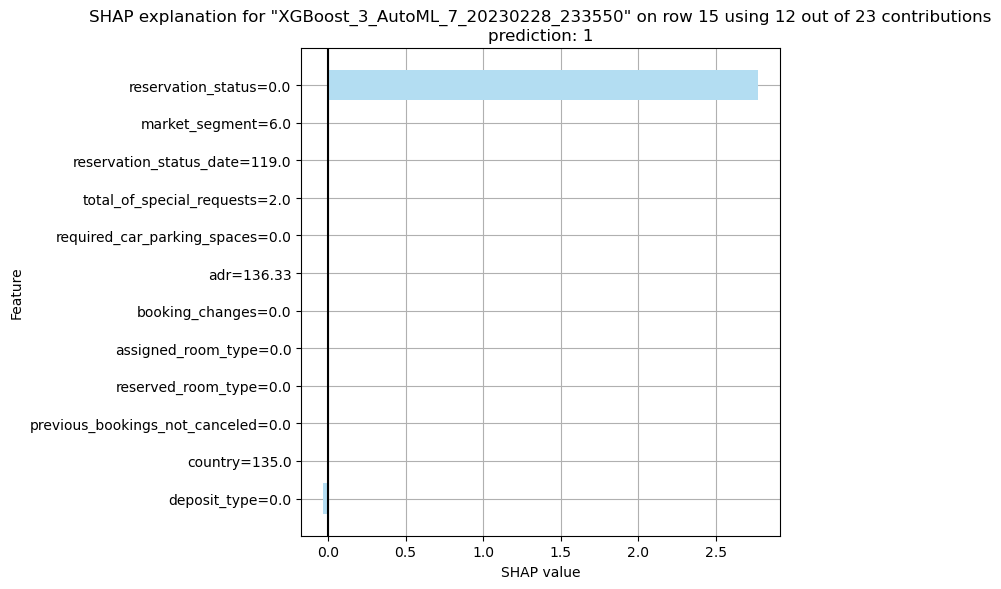

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = df_test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")

## Conclusion
In this notebook, we examined how H2O AutoML can be used to:

- Describe a dataset
- Train models with minimal human inputs
- Make predictions on a trained model
- Explain the model’s predictions
- The best performing model is XGBoost

## Answers for questions
**Is the relationship significant?**
*  A: A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘babies’, 'meal' and ‘days_in_waiting_list’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.


**Are any model assumptions violated?**
* A: Different machine learning algorithms and models may have different assumptions, and the assumptions may be violated to different extents depending on the specific dataset. However, in general, some common assumptions in machine learning models include:

1. Linearity: Many machine learning algorithms, such as linear regression and logistic regression, assume a linear relationship between the input features and the output variable. If the relationship is not linear, the model may not fit the data well. The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

2. Independence: This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables as noticed abive in the correlation heatmap.

3. Homoscedasticity: Some machine learning algorithms, such as linear regression, assume that the variance of the errors is constant across all levels of the input features. If the variance is not constant, the model may not fit the data well. The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

If any of these assumptions are violated, the performance of the models may be affected, and the models may not generalize well to new data. Therefore, it is important to assess the assumptions of each model generated by AutoML and identify any potential issues. This can be done by examining diagnostic plots and statistical tests for each model. If any assumptions are violated, appropriate data preprocessing or model modifications may be necessary to improve the model performance.

**Is there any multicollinearity in the model?**
* A: When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved. Currently high correlation exists between is_canceled and deposit_type as well as is_canceled and reservation_status.

**In the multivariate models are predictor variables independent of all the other predictor variables?**
* A: Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that is_canceled and deposit_type as well as is_canceled and reservation_status are correlated to each other. Other than those other predictors are independent from each other.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
* A: From the variable importance plot, the most to least important variables are displayed. For my model reservation_status, deposit_type, country and lead_time are top 4 most important variables to determine is_canceled.

**Does the model make sense?**
* A: To determine if a model makes sense, you can start by examining its performance metrics, such as accuracy, precision, recall, or F1 score, depending on the type of problem being addressed. If the performance metrics are consistently high and the model generalizes well to new data, it is an indication that the model is effective at learning the patterns in the data.

However, high performance metrics alone do not necessarily mean that the model makes sense. It is also important to examine the interpretability of the model and check whether it aligns with the domain knowledge or the problem being addressed. If the model provides insights into the underlying factors that drive the outcomes or can be used to make informed decisions, it is an indication that the model makes sense.

Furthermore, it is important to check for any obvious errors or inconsistencies in the model, such as implausible coefficient values or highly influential data points, which may indicate a problem with the modeling technique or the data. Additionally, it is helpful to perform sensitivity analysis and robustness checks to assess the stability of the model and its performance under different scenarios. Yes, For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.851 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

**Does regularization help?**
* Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty term to the objective function, which encourages the model to select simpler or more generalizable solutions. There are several types of regularization techniques, including L1 regularization (Lasso), L2 regularization (Ridge), and Elastic Net regularization.

In general, regularization can help improve the performance and generalization ability of machine learning models, especially when the number of features is large compared to the number of observations or when the features are highly correlated with each other.

Regularization helps to reduce the variance of the model by shrinking the coefficient estimates towards zero, which reduces the complexity of the model and helps to avoid overfitting. By controlling the magnitude of the penalty term, regularization can also help to balance the trade-off between bias and variance in the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

**Which independent variables are significant?**
* The most significant predictor variable is reservation_status, deposit_type, country and lead_time as seen from the variable importance plot.

**Which hyperparameters are important?**
* To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 500}

**Coding professionalism?**
* Yes.

## References

1. [Regularization](https://harish-reddy.medium.com/regularization-in-python-699cfbad8622)
2. [SHAP Summary](https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454)
3. [AutoML](https://towardsdatascience.com/python-automl-sklearn-fd85d3b3c5e)
4. [Correlation-Analysis](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
5. [OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)
6. [AutoML](https://www.automl.org/automl/)

MIT License

Copyright (c) 2023 Naman Diwan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.